#**Time Series Analysis of Corona Virus cases in African Countries (January 15th 2020 to May 1st 2020)**

The Coronavirus (COVID-19) is an infectious disease which was first discovered in Wuhan, China in December 2019. It was declared a pandemic by the World Health Organization on 30th January 2020. As at early May, the virus has spread to more than 200 countries worldwide including African countries which form the focus of this project. 

In this project, I analysed COVID-19 data from African countries including data on confirmed cases (both daily and total), symptoms, deaths, government measures and school closures. 

**The BIG IDEA questions are:**
1. Can we predict the likelihood of occurrence and the rate of occurrence of a COVID case, in a country, in the near future?   
2. What are the patterns in how the variables in the datasets relate over time? 
3. What is the trend in COVID cases over the days under study? 
4. Can we predict the likelihood of occurrence of a COVID case considering age structure of the countries under study or even other indicators of other non-African countries? 

The datasets needed for this project were mainly gathered from  [Our World in Data](https://ourworldindata.org), the [European Centre for Disease Prevention and Control (ECDC)](https://www.ecdc.europa.eu/en), the [Centre for Systems Science and Engineering at Johns Hopkins University](https://github.com/CSSEGISandData) and the [World Health Organization (WHO)](https://www.who.int/)

# Import all needed libraries

I imported all needed libraries, including `nltk` to perform natural language processing on text data from the datasets and `sklearn` for ensemble learning and evaluation of the models used. 

In [ ]:
import pandas as pd
import sys
import nltk #to handle natural language processing
import sklearn 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder #convert class labels to binary
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
#import train_test_split from sklearn to split the data to training and test data:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score #imported to measure the auc score
from sklearn.linear_model import LogisticRegressionCV #for cross validaton on logistic regression model
from datetime import datetime,timedelta
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from google.colab import files
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Loading needed datasets

After accessing data from the sources stated above, I loaded `27` datasets from a local file directory. The first set of `19` datasets contain primarily numerical data on COVID worldwide including the number of confirmed cases, confirmed deaths, epidemiological trajectory, confirmed cases per million and the 3-day average of COVID cases. The second set of `8` datasets contain information on indicators such as government measures per day per country, population density and global school closures. I also uploaded [data](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv) from the European Centre for Disease Prevention and Control, which contains information on the population of different countries. From this same website, I got about 260,000 rows of [data](https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv) on detailed information on confirmed COVID patients including data on age,	sex, symptoms, travel_history dates	and location, whether the person had a chronic disease etc.

In [ ]:
#to upload time series data only
Time_Series_Datasets = []
uploaded = files.upload()
for fn in uploaded.keys():
  Time_Series_Datasets.append(fn)
Time_Series_Datasets

Saving coronavirus-cfr.csv to coronavirus-cfr.csv
Saving covid-19-total-confirmed-cases-vs-total-confirmed-deaths.csv to covid-19-total-confirmed-cases-vs-total-confirmed-deaths.csv
Saving covid-confirmed-cases-since-100th-case.csv to covid-confirmed-cases-since-100th-case.csv
Saving covid-confirmed-daily-cases-epidemiological-trajectory.csv to covid-confirmed-daily-cases-epidemiological-trajectory.csv
Saving covid-confirmed-daily-deaths-epidemiological-trajectory.csv to covid-confirmed-daily-deaths-epidemiological-trajectory.csv
Saving covid-confirmed-deaths-since-5th-death.csv to covid-confirmed-deaths-since-5th-death.csv
Saving daily-cases-covid-19.csv to daily-cases-covid-19.csv
Saving daily-covid-cases-3-day-average.csv to daily-covid-cases-3-day-average.csv
Saving daily-covid-deaths-3-day-average.csv to daily-covid-deaths-3-day-average.csv
Saving daily-deaths-covid-19.csv to daily-deaths-covid-19.csv
Saving new-covid-cases-per-million.csv to new-covid-cases-per-million.csv
Saving

['coronavirus-cfr.csv',
 'covid-19-total-confirmed-cases-vs-total-confirmed-deaths.csv',
 'covid-confirmed-cases-since-100th-case.csv',
 'covid-confirmed-daily-cases-epidemiological-trajectory.csv',
 'covid-confirmed-daily-deaths-epidemiological-trajectory.csv',
 'covid-confirmed-deaths-since-5th-death.csv',
 'daily-cases-covid-19.csv',
 'daily-covid-cases-3-day-average.csv',
 'daily-covid-deaths-3-day-average.csv',
 'daily-deaths-covid-19.csv',
 'new-covid-cases-per-million.csv',
 'new-covid-deaths-per-million.csv',
 'total-and-daily-cases-covid-19.csv',
 'total-confirmed-cases-of-covid-19-per-million-people.csv',
 'total-covid-deaths-per-million.csv',
 'total-daily-covid-cases-per-million.csv',
 'total-daily-covid-deaths.csv',
 'total-daily-covid-deaths-per-million.csv',
 'total-deaths-covid-19.csv']

In [ ]:
#to upload files from COVID 19 indicator folder 
Indicator_Datasets = files.upload() 

Saving acaps-covid-19-government-measures-dataset.csv to acaps-covid-19-government-measures-dataset.csv
Saving countries-population-density.csv to countries-population-density.csv
Saving global-school-closures-covid-19.csv to global-school-closures-covid-19.csv
Saving inform-covid-indicators.csv to inform-covid-indicators.csv
Saving latestdata.csv to latestdata.csv
Saving per-million-people-tests-conducted-vs-total-confirmed-cases-of-covid-19.csv to per-million-people-tests-conducted-vs-total-confirmed-cases-of-covid-19.csv
Saving share-of-the-population-that-is-70-years-and-older.csv to share-of-the-population-that-is-70-years-and-older.csv
Saving who-situation-reports-covid-19.csv to who-situation-reports-covid-19.csv


In [ ]:
#Adding more needed dataframes from ECDC:
df_World_Cases_Pop = pd.read_csv (r'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df_World_Cases_Pop = df_World_Cases_Pop.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#dataframe on age structure for the different countries:
df_World_Age = pd.read_csv("share-of-the-population-that-is-70-years-and-older.csv")
df_World_Age = df_World_Age.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#another mega dataframe that can be helpful
#change to read "latestdata" from the indicators folder
df_World_Mega = pd.read_csv("latestdata.csv")
df_World_Mega = df_World_Mega.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#also have data on population density of the differnet countries 
#another mega dataframe that can be helpful
df_World_Pop_Density = pd.read_csv("https://raw.githubusercontent.com/tillnagel/unfolding/master/data/data/countries-population-density.csv", sep=';')
df_World_Pop_Density = df_World_Pop_Density.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#covid indicators data
df_World_Indicators_Mega = pd.read_csv("inform-covid-indicators.csv")
df_World_Indicators_Mega = df_World_Indicators_Mega.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#covid government measures
df_World_Gov_Measures = pd.read_csv("acaps-covid-19-government-measures-dataset.csv")
df_World_Gov_Measures = df_World_Gov_Measures.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#global school closures
df_World_School_Closures = pd.read_csv("global-school-closures-covid-19.csv")
df_World_School_Closures = df_World_School_Closures.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#total_confirmed_cases_of_covid_19_per_million_people_cases_per_million
df_World_Tests = pd.read_csv("per-million-people-tests-conducted-vs-total-confirmed-cases-of-covid-19.csv")
df_World_Tests = df_World_Tests.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
#total_confirmed_cases_of_covid_19_per_million_people_cases_per_million
df_World_Mega_2 = pd.read_csv("who-situation-reports-covid-19.csv")
df_World_Mega_2 = df_World_Mega_2.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,10,11,13,14,15,16,17,18,19,20,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning data

I then cleaned the data, in preparation for the modeling process, using the following tools:

*   reading the datasets into a dataframe using `pd.read_csv()`
*   converting all entries in the datasets into lower cases using `df.apply` and `str.lower()`
* converting all Data columns to datetime objects using `pd.to_datetime()`.
* merging all time series datasets using `pd.merge()` by considering the `Date`, `Entity` and `Entity Code` columns.
* I used `.isnull()` and `.sum()` to find out the percentage of missing data in each column of the dataset.


In [ ]:
#after loading each dataframe, convert all strings to lower case for uniformity 
#and to help with extracting the needed african countries etc data
df = pd.read_csv(Time_Series_Datasets[0])
df=df.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

df2 = pd.read_csv(Time_Series_Datasets[1])
df2=df2.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
df2["Date"] = pd.to_datetime(df2["Date"])
new_df= pd.merge(df, df2, left_on=["Date", "Entity", "Code"], right_on=["Date", "Entity", "Code"]) #rather have to merge if the date and country are the same 
new_df.head()

df = pd.read_csv(Time_Series_Datasets[0])
df["Date"] = pd.to_datetime(df["Date"])
df_World = df.copy()
for i in Time_Series_Datasets:
  df3 = pd.read_csv(i)
  df3["Date"] = pd.to_datetime(df3["Date"])
  df_World = pd.merge(df_World, df3, left_on=["Date", "Entity", "Code"], right_on=["Date", "Entity", "Code"]) 
df_World.head()
df_World.isnull().sum()/df_World.shape[0]

df_World=df_World.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
df_World.shape
df_World.head()

#drop duplicated data from dataframe
print(df_World_Mega.duplicated().sum())
df_World_Mega = df_World_Mega.drop_duplicates(keep = 'first')

4


# Exploring data and extracting needed dataframes

To prepare the data for further analysis, I thoroughly explored the columns of the datasets and extracted the needed dataframes. This was done using the following tools:


*   `.duplicated()` and `.sum()` to determine if there were any duplications in the rows of the datasets
*   Using a `for` loop to extract the rows of `df_World` which have data on the respective continents: `africa, asia, north america, oceania, europe, south america, australia, and world` and combined the data into the `df_Continents` dataframe
* Using the same method, I also extracted the rows that had information for only African countries and combined them into the `df_Africa` dataframe
* I also used the same method to extract data for only African countries from the `df_World_Cases_Pop` dataframe and combined them into the `df_Africa_Cases_Pop` dataframe. 
* I did same for the `df_Africa_Mega` dataframe which was extracted from the `df_World_Mega` dataframe, the `df_Africa_Pop_Density` dataframe which was extracted from the `df_World_Pop_Density` dataframe.
* This same process was done for the `df_World_Indicators_Mega`, `df_World_Gov_Measures`, `df_World_School_Closures`, `df_World_Tests` and `df_World_Mega_2` dataframes. 
* As a guide for measuring the extent of social distancing in the different countries, I combined the `df_World_Cases_Pop`, `df_World_Gov_Measures`, aand `df_World_School_Closures` dataframes into the `df_World_Cases_Gov_School` dataframe.
* Using a similar method, I created the `df_Africa_Cases_Gov_School` dataframe 




In [ ]:
print("Number of duplications:", df_World.duplicated().sum()) #no duplications

#extracting the continents
alist = ["africa","asia","north america","oceania",
                             "europe","south america", "australia","world"]

indexlist = []
count = 0
for i in df_World['Entity']:
  if i in alist:
    indexlist.append(count)
  count +=1
print(alist) 
print(indexlist)

# Extract those rows of the dataframe
df_Continents = df_World.loc[indexlist]
df_Continents["Entity"].unique()
df_Continents.shape
df_Continents.head() #this is a seperate dataframe for only continents, that we can use later on 

Number of duplications: 0
['africa', 'asia', 'north america', 'oceania', 'europe', 'south america', 'australia', 'world']
[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 1

,Entity,Code,Date,Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases) (%)_x,Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases) (%)_y,Total confirmed deaths due to COVID-19 (deaths)_x,Total confirmed cases of COVID-19 (cases),(cases),Days since the 100th confirmed case (days),Unnamed: 3_x,Days since confirmed cases first reached 30 per day,Unnamed: 3_y,Days since 5 daily deaths first reported,(deaths),Days since the 5th total confirmed death,Daily confirmed cases (cases),"Daily new confirmed cases of COVID-19 (rolling 3-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 (rolling 3-day average, right-aligned)",Daily confirmed deaths (deaths),Daily new confirmed cases of COVID-19 per million people (cases),Daily new confirmed deaths due to COVID-19 per million people (deaths per million),Total confirmed cases (cases),Daily new confirmed cases (cases),Total confirmed cases of COVID-19 per million people (cases per million),Total confirmed deaths due to COVID-19 per million people (deaths per million),Total confirmed cases per million (cases per million),Daily new confirmed cases per million (cases),Total confirmed deaths (deaths),Daily new confirmed deaths (deaths),Total confirmed deaths per million (deaths per million),Daily confirmed deaths per million (deaths per million),Total confirmed deaths due to COVID-19 (deaths)_y
22,africa,nan,2020-03-12,1.694915,1.694915,2.0,118,118.0,1.0,14.000000,-4.0,0.285714,-11.0,2.0,-2.0,13,11.666667,0.333333,1,0.009697,0.000746,118,13.0,0.088020,0.001492,0.088020,0.009697,2,1.0,0.001492,0.000746,2
23,africa,nan,2020-03-13,2.515723,2.515723,4.0,159,159.0,2.0,18.571429,-3.0,0.571429,-10.0,4.0,-1.0,41,21.333333,1.000000,2,0.030583,0.001492,159,41.0,0.118604,0.002984,0.118604,0.030583,4,2.0,0.002984,0.001492,4
24,africa,nan,2020-03-14,2.475248,2.475248,5.0,202,202.0,3.0,22.714286,-2.0,0.714286,-9.0,5.0,NaN,43,32.333333,1.333333,1,0.032075,0.000746,202,43.0,0.150679,0.003730,0.150679,0.032075,5,1.0,0.003730,0.000746,5
25,africa,nan,2020-03-15,2.510460,2.510460,6.0,239,239.0,4.0,27.857143,-1.0,0.857143,-8.0,6.0,1.0,37,40.333333,1.333333,1,0.027600,0.000746,239,37.0,0.178279,0.004476,0.178279,0.027600,6,1.0,0.004476,0.000746,6
26,africa,nan,2020-03-16,2.469136,2.469136,8.0,324,324.0,5.0,34.428571,NaN,1.000000,-7.0,8.0,2.0,85,55.000000,1.333333,2,0.063405,0.001492,324,85.0,0.241683,0.005967,0.241683,0.063405,8,2.0,0.005967,0.001492,8


In [ ]:
#Now, extract the African countries stated:
#OLD LIST
WestAfrica_list =  ["Burkina Faso", "Cameroon", "Cote d’Ivoire", "Ghana", "Nigeria", 
            "Senegal", "Ivory Coast", "Côte d'Ivoire", "Benin", "Burkina Faso", "Cape Verde", 
            "Cabo Verde", "The Gambia", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Guinea Bissau"
           "Ivory Coast", "Cote d’Ivoire", "Côte d'Ivoire", "Liberia", "Mali", 
           "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone","Togo",
           "Saint Helena","St Helena", "St. Helena","Sao Tome and Principe", 
           "Sao Tome & Principe", "Cameroon"] 

WA_list = ["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon","Cape Verde",
           "Central African Republic","Chad","Comoros","Congo-Brazzaville","Congo-Kinshasa","Cote d'Ivoire",
           "Djibouti","Egypt","Equatorial Guinea","Eritrea","Ethiopia","Gabon","Gambia","Ghana",
           "Guinea","Guinea Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi",
           "Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria","Rwanda"
           "Senegal","Seychelles","Sierra Leone","Somalia","South Africa","South Sudan","Sudan","Swaziland",
           "São Tomé and Príncipe","Tanzania","Togo","Tunisia","Uganda","Western Sahara","Zambia","Zimbabwe","Burkina Faso", "Cameroon", "Cote d’Ivoire", "Ghana", "Nigeria", 
            "Senegal", "Ivory Coast", "Côte d'Ivoire", "Benin", "Burkina Faso", "Cape Verde", 
            "Cabo Verde", "The Gambia", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Guinea Bissau"
           "Ivory Coast", "Cote d’Ivoire", "Côte d'Ivoire", "Liberia", "Mali", 
           "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone","Togo",
           "Saint Helena","St Helena", "St. Helena","Sao Tome and Principe", 
           "Sao Tome & Principe", "Cameroon"]

#lowercase of each country name:
WA_list = [string.lower() for string in WA_list]
WAindexlist = []
counter = 0
for i in df_World['Entity']:
  if i in WA_list:
      WAindexlist.append(counter)
  counter +=1
print(WAindexlist)
#Extract those rows of the dataframe
df_Africa = df_World.loc[WAindexlist]
df_Africa.head() #this is a seperate dataframe for only African countries, that we can use later on 

[91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 1050, 1051, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1351, 1352, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1460, 1461, 1462, 1463, 1464, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 2000, 2001, 2002, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2138, 2139, 2140, 2141, 2142, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231,

,Entity,Code,Date,Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases) (%)_x,Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases) (%)_y,Total confirmed deaths due to COVID-19 (deaths)_x,Total confirmed cases of COVID-19 (cases),(cases),Days since the 100th confirmed case (days),Unnamed: 3_x,Days since confirmed cases first reached 30 per day,Unnamed: 3_y,Days since 5 daily deaths first reported,(deaths),Days since the 5th total confirmed death,Daily confirmed cases (cases),"Daily new confirmed cases of COVID-19 (rolling 3-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 (rolling 3-day average, right-aligned)",Daily confirmed deaths (deaths),Daily new confirmed cases of COVID-19 per million people (cases),Daily new confirmed deaths due to COVID-19 per million people (deaths per million),Total confirmed cases (cases),Daily new confirmed cases (cases),Total confirmed cases of COVID-19 per million people (cases per million),Total confirmed deaths due to COVID-19 per million people (deaths per million),Total confirmed cases per million (cases per million),Daily new confirmed cases per million (cases),Total confirmed deaths (deaths),Daily new confirmed deaths (deaths),Total confirmed deaths per million (deaths per million),Daily confirmed deaths per million (deaths per million),Total confirmed deaths due to COVID-19 (deaths)_y
91,algeria,dza,2020-03-21,9.803922,9.803922,10.0,102,102.0,NaN,10.857143,-5.0,1.142857,-12.0,10.0,3.0,12,14.000000,1.666667,3,0.273654,0.068413,102,12.0,2.326056,0.228045,2.326056,0.273654,10,3.0,0.228045,0.068413,10
92,algeria,dza,2020-03-22,10.791367,10.791367,15.0,139,139.0,1.0,14.571429,-4.0,1.857143,-11.0,15.0,4.0,37,22.333333,3.000000,5,0.843766,0.114022,139,37.0,3.169822,0.342067,3.169822,0.843766,15,5.0,0.342067,0.114022,15
93,algeria,dza,2020-03-23,8.457711,8.457711,17.0,201,201.0,2.0,21.857143,-3.0,1.857143,-10.0,17.0,5.0,62,37.000000,3.333333,2,1.413877,0.045609,201,62.0,4.583699,0.387676,4.583699,1.413877,17,2.0,0.387676,0.045609,17
94,algeria,dza,2020-03-25,7.196970,7.196970,19.0,264,264.0,4.0,29.142857,-1.0,2.000000,-8.0,19.0,7.0,34,41.666667,1.333333,2,0.775352,0.045609,264,34.0,6.020381,0.433285,6.020381,0.775352,19,2.0,0.433285,0.045609,19
95,algeria,dza,2020-03-26,6.953642,6.953642,21.0,302,302.0,5.0,32.857143,NaN,2.142857,-7.0,21.0,8.0,38,33.666667,1.333333,2,0.866570,0.045609,302,38.0,6.886951,0.478894,6.886951,0.866570,21,2.0,0.478894,0.045609,21


In [ ]:
#A dataframe for population of African countries only
WAindexlist2 = []
counter = 0
for i in df_World_Cases_Pop['countriesAndTerritories']:
# for i in df_World_Cases_Pop['Country']:
  if i in WA_list:
      WAindexlist2.append(counter)
  counter +=1
print(WAindexlist2)
#Extract those rows of the dataframe
df_Africa_Cases_Pop = df_World_Cases_Pop.loc[WAindexlist2]
df_Africa_Cases_Pop.head()

[191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
191,13/05/2020,13,5,2020,176,8,algeria,dz,dza,42228429.0,africa
192,12/05/2020,12,5,2020,168,5,algeria,dz,dza,42228429.0,africa
193,11/05/2020,11,5,2020,165,8,algeria,dz,dza,42228429.0,africa
194,10/05/2020,10,5,2020,189,6,algeria,dz,dza,42228429.0,africa
195,09/05/2020,9,5,2020,187,5,algeria,dz,dza,42228429.0,africa


In [ ]:
WAindexlist2 = []
counter = 0
for i in df_World_Mega['country']:
  if i in WA_list:
      WAindexlist2.append(counter)
  counter +=1
print(WAindexlist2)
#Extract those rows of the dataframe
df_Africa_Mega = df_World_Mega.loc[WAindexlist2]
df_Africa_Mega.duplicated().sum() #no duplications
df_Africa_Mega.head(30)

[729, 744, 1586, 2551, 3377, 3390, 3403, 3416, 3428, 3515, 4454, 4496, 4497, 4527, 4639, 4640, 4645, 5222, 5233, 6354, 6432, 6433, 6434, 6435, 6436, 6437, 6440, 6441, 6442, 9555, 9556, 9640, 27283, 27395, 65391, 65394, 65395, 65396, 65397, 65398, 65399, 65400, 65401, 65402, 65403, 65405, 65406, 65407, 65408, 65409, 65410, 65411, 65412, 65413, 65414, 65416, 65417, 65418, 65419, 65420, 65421, 65422, 65423, 65424, 65425, 65427, 65428, 65429, 65430, 65431, 65432, 65433, 65434, 65435, 65436, 65437, 65438, 65439, 65440, 65441, 65442, 65443, 65444, 65445, 65446, 65447, 65448, 65449, 65450, 65451, 65452, 65453, 65454, 65455, 65456, 65457, 65458, 65459, 65460, 65461, 65462, 65463, 65464, 65465, 65466, 65467, 65468, 65469, 65470, 65471, 65472, 65473, 65474, 65475, 65476, 65477, 65478, 65479, 65480, 65481, 65482, 65483, 65484, 65485, 65486, 65487, 65488, 65489, 65490, 65491, 65492, 65493, 65494, 65495, 65496, 65497, 65498, 65499, 65500, 65501, 65502, 65504, 65505, 65506, 65507, 65508, 65509, 6551

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
729,000-1-10586,nan,nan,yokohama port,kanagawa prefecture,japan,1.0,35.450850,139.665100,point,nan,nan,17.02.2020,nan,nan,nan,nan,nan,"85 new cases on ""diamond princess"" cruise ship...",nan,nan,https://www3.nhk.or.jp/news/html/20200217/k100...,nan,nan,nan,nan,yokohama port,nan,nan,kanagawa prefecture,japan,19,nan,NaN
744,000-1-10599,nan,nan,yokohama port,kanagawa prefecture,japan,1.0,35.450850,139.665100,point,nan,nan,17.02.2020,nan,nan,nan,nan,nan,"85 new cases on ""diamond princess"" cruise ship...",nan,nan,https://www3.nhk.or.jp/news/html/20200217/k100...,nan,nan,nan,nan,yokohama port,nan,nan,kanagawa prefecture,japan,19,nan,NaN
1586,000-1-11291,28,male,nan,nan,singapore,1.0,1.353460,103.815100,admin0,nan,nan,14.02.2020,nan,nan,nan,nan,nan,case 66; linked to the grace assembly of god c...,nan,nan,https://www.channelnewsasia.com/news/singapore...,nan,discharge,20.02.2020,nan,nan,nan,nan,nan,singapore,205,nan,NaN
2551,000-1-12095,40,male,nan,taiwan,nan,1.0,23.759470,120.955900,admin1,29.01.2020,23.02.2020,24.02.2020,nan,nan,02.12.2019,guangzhou,nan,case 29; admitted to hospital due to connectio...,nan,nan,https://www.cdc.gov.tw/bulletin/detail/dazcp9f...,nan,nan,nan,nan,nan,nan,nan,taiwan (province of china),nan,1,nan,NaN
3377,000-1-12776,nan,nan,nan,daegu,south korea,1.0,35.781340,128.580000,admin1,nan,nan,28.02.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ncov.mohw.go.kr/tcmboardview.do?brdid=&...,nan,nan,nan,nan,nan,nan,nan,daegu,south korea,4,nan,NaN
3390,000-1-12787,nan,nan,nan,daegu,south korea,1.0,35.781340,128.580000,admin1,nan,nan,28.02.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ncov.mohw.go.kr/tcmboardview.do?brdid=&...,nan,nan,nan,nan,nan,nan,nan,daegu,south korea,4,nan,NaN
3403,000-1-12798,nan,nan,nan,daegu,south korea,1.0,35.781340,128.580000,admin1,nan,nan,28.02.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ncov.mohw.go.kr/tcmboardview.do?brdid=&...,nan,nan,nan,nan,nan,nan,nan,daegu,south korea,4,nan,NaN
3416,000-1-12807,nan,nan,nan,daegu,south korea,1.0,35.781340,128.580000,admin1,nan,nan,28.02.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ncov.mohw.go.kr/tcmboardview.do?brdid=&...,nan,nan,nan,nan,nan,nan,nan,daegu,south korea,4,nan,NaN
3428,000-1-12817,nan,nan,nan,daegu,south korea,1.0,35.781340,128.580000,admin1,nan,nan,28.02.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ncov.mohw.go.kr/tcmboardview.do?brdid=&...,nan,nan,nan,nan,nan,nan,nan,daegu,south korea,4,nan,NaN
3515,000-1-1289,nan,nan,orleans parish,louisiana,united states,1.0,30.069230,-89.931200,admin2,nan,nan,14.03.2020,nan,nan,nan,nan,nan,nan,nan,nan,http://ldh.la.gov/coronavirus/,nan,nan,nan,nan,nan,nan,orleans parish,louisiana,united states,1148,nan,NaN


In [ ]:
df_World_Pop_Density["Country Name"].unique()
WAindexlist3 = []
counter = 0
for i in df_World_Pop_Density['Country Name']:
  if i in WA_list:
      WAindexlist3.append(counter)
  counter +=1
print(WAindexlist3)
#Extract those rows of the dataframe
df_Africa_Pop_Density = df_World_Pop_Density.loc[WAindexlist3]
df_Africa_Pop_Density.head(30)

[34, 37, 52, 57, 61, 62, 64, 66, 68, 69, 74, 78, 85, 91, 92, 94, 100, 104, 111, 112, 131, 141, 142, 143, 149, 150, 153, 156, 157, 165, 166, 168, 174, 175, 195, 197, 199, 200, 206, 207, 208, 215, 217, 222, 225, 228, 233, 246, 247]


,Country Name,Country Code,2010
34,algeria,dza,14.891634
37,angola,ago,15.306008
52,benin,ben,80.003616
57,botswana,bwa,3.541369
61,burkina faso,bfa,60.190058
62,burundi,bdi,326.401869
64,cameroon,cmr,41.460938
66,cape verde,cpv,123.076923
68,central african republic,caf,7.064432
69,chad,tcd,8.915978


In [ ]:
df_World_Indicators_Mega["country"].unique()
WAindexlist4 = []
counter = 0
for i in df_World_Indicators_Mega['country']:
  if i in WA_list:
      WAindexlist4.append(counter)
  counter +=1
print(WAindexlist4)
#Extract those rows of the dataframe
df_Africa_Indicators_Mega = df_World_Indicators_Mega.loc[WAindexlist4]
df_Africa_Indicators_Mega.head()

[2, 3, 17, 21, 25, 26, 27, 29, 31, 32, 36, 40, 46, 50, 52, 53, 56, 60, 61, 64, 68, 69, 86, 95, 96, 97, 101, 102, 105, 108, 109, 115, 116, 118, 124, 125, 147, 149, 151, 152, 157, 158, 159, 162, 168, 171, 174, 178, 189, 190]


,country,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,proportion_of_population_with_basic_handwashing_facilities_on_premises,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_health_conditions,inform_epidemic_vulnerability,mortality_rate_under_5,prevalence_of_undernourishment,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio
2,algeria,dza,4.0,4.3,17.73,72.629000000000005,83.74,87.58657,2.9,0.4,5.9,24,3.9,4.4,3.8,3.6,18.30,998.15,140.00
3,angola,ago,5.2,6.7,24.71,65.513999999999996,26.66,49.87698,5.0,5,5.8,81.099998474121094,25.0,7.1,8.1,5.4,2.15,185.82,477.00
17,benin,ben,4.4,7.1,101.85,47.311999999999998,11.03,16.45292,5.1,4.5,5.9,98.300003051757798,10.1,6.8,6.9,6.9,1.57,83.48,405.00
21,botswana,bwa,3.2,3.9,3.98,69.445999999999998,no data,77.26922,3.4,4.2,5.1,37.599998474121101,26.4,4.6,4.9000000000000004,5.2,3.69,931.30,129.00
25,burkina faso,bfa,5.3,7.7,72.19,29.358000000000001,11.88,19.40209,5.8,4,5.5,81.199996948242202,20.0,6.6,6.9,5.8,0.60,115.60,371.00


In [ ]:
df_World_Gov_Measures["country"].unique()
WAindexlist5 = []
counter = 0
for i in df_World_Gov_Measures['country']:
  if i in WA_list:
      WAindexlist5.append(counter)
  counter +=1
print(WAindexlist5)
#Extract those rows of the dataframe
df_Africa_Gov_Measures = df_World_Gov_Measures.loc[WAindexlist5]
df_Africa_Gov_Measures.head()

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 831, 832, 833, 834, 835, 836, 837, 8

,id,country,iso,admin_level_name,pcode,region,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative_source
33,36,algeria,dza,nan,NaN,africa,public health measures,awareness campaigns,f,nan,not applicable,2020-03-05,xinhuanet,media,http://www.xinhuanet.com/english/2020-03/05/c_...,2020-03-14,nan
34,37,algeria,dza,nan,NaN,africa,social distancing,schools closure,f,until 5th april,not applicable,2020-03-12,us embassy,government,https://dz.usembassy.gov/covid-19-information/,2020-03-14,nan
35,39,algeria,dza,nan,NaN,africa,movement restrictions,border checks,t,entry denied to people with symptoms,not applicable,2020-03-12,us embassy,government,https://dz.usembassy.gov/covid-19-information/,2020-03-14,nan
36,40,algeria,dza,nan,NaN,africa,social distancing,limit public gatherings,f,nan,not applicable,2020-03-12,qantara 13/03/2020,media,https://en.qantara.de/content/coronavirus-in-t...,2020-03-14,nan
37,961,algeria,dza,nan,NaN,africa,social distancing,public services closure,f,banned all types of gatherings (including all ...,nan,2020-03-20,us embassy of algeria,government,https://dz.usembassy.gov/covid-19-information/,2020-03-20,nan


In [ ]:
df_World_School_Closures["country"].unique()
WAindexlist6 = []
counter = 0
for i in df_World_School_Closures['country']:
  if i in WA_list:
      WAindexlist6.append(counter)
  counter +=1
print(WAindexlist6)
#Extract those rows of the dataframe
df_Africa_School_Closures = df_World_School_Closures.loc[WAindexlist6]
df_Africa_School_Closures.head()

[422, 485, 553, 623, 686, 706, 708, 711, 714, 717, 718, 738, 744, 745, 752, 761, 763, 781, 782, 790, 793, 814, 829, 838, 840, 843, 846, 849, 850, 851, 871, 877, 878, 885, 894, 896, 914, 915, 923, 926, 947, 962, 963, 972, 974, 977, 982, 985, 986, 987, 988, 1008, 1014, 1015, 1022, 1031, 1034, 1053, 1054, 1058, 1065, 1069, 1079, 1091, 1107, 1108, 1119, 1121, 1124, 1129, 1132, 1133, 1134, 1135, 1156, 1163, 1164, 1168, 1172, 1177, 1182, 1184, 1186, 1205, 1206, 1210, 1218, 1222, 1234, 1246, 1256, 1263, 1264, 1267, 1274, 1277, 1279, 1282, 1288, 1291, 1292, 1293, 1294, 1316, 1323, 1324, 1328, 1332, 1337, 1342, 1344, 1346, 1365, 1366, 1370, 1372, 1373, 1380, 1383, 1384, 1387, 1390, 1401, 1402, 1414, 1424, 1431, 1432, 1435, 1442, 1445, 1447, 1450, 1456, 1459, 1460, 1461, 1462, 1484, 1491, 1492, 1496, 1500, 1503, 1506, 1511, 1513, 1515, 1516, 1535, 1536, 1540, 1542, 1543, 1550, 1553, 1554, 1557, 1560, 1571, 1572, 1584, 1594, 1601, 1602, 1605, 1612, 1615, 1617, 1620, 1626, 1629, 1630, 1631, 1632, 

,date,iso,country,scale,note
422,2020-03-12,dza,algeria,national,nan
485,2020-03-13,dza,algeria,national,nan
553,2020-03-14,dza,algeria,national,nan
623,2020-03-15,dza,algeria,national,nan
686,2020-03-16,bfa,burkina faso,national,nan


In [ ]:
df_World_Tests["Entity"].unique()
WAindexlist7 = []
counter = 0
for i in df_World_Tests['Entity']:
  if i in WA_list:
      WAindexlist7.append(counter)
  counter +=1
print(WAindexlist7)
#Extract those rows of the dataframe
df_Africa_Tests = df_World_Tests.loc[WAindexlist7]
df_Africa_Tests.head()

[185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1

,Entity,Code,Date,Number of tests per confirmed case,Total confirmed cases of COVID-19 per million people (cases per million)
185,algeria,dza,"feb 26, 2020",NaN,0.022804
186,algeria,dza,"feb 27, 2020",NaN,0.022804
187,algeria,dza,"feb 28, 2020",NaN,0.022804
188,algeria,dza,"feb 29, 2020",NaN,0.022804
189,algeria,dza,"mar 1, 2020",NaN,0.068413


In [ ]:
#who situations report
df_World_Mega_2["reporting_country_territory"].unique()
WAindexlist8 = []
counter = 0
for i in df_World_Mega_2['reporting_country_territory']:
  if i in WA_list:
      WAindexlist8.append(counter)
  counter +=1
print(WAindexlist8)
#Extract those rows of the dataframe
df_Africa_Mega_2 = df_World_Mega_2.loc[WAindexlist8]
df_Africa_Mega_2.head()

[92, 95, 98, 103, 105, 106, 107, 160, 161, 162, 164, 165, 166, 167, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 291, 295, 297, 302, 303, 305, 306, 359, 360, 361, 363, 364, 365, 366, 368, 370, 371, 372, 374, 375, 376, 377, 379, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 491, 496, 499, 502, 504, 505, 506, 559, 560, 561, 562, 563, 564, 566, 567, 570, 571, 572, 574, 575, 577, 578, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 692, 697, 700, 703, 705, 706, 707, 760, 761, 762, 763, 764, 765, 766, 767, 768, 771, 772, 773, 774, 776, 777, 778, 779, 780, 781, 782, 784, 785, 786, 787, 788, 790, 791, 792, 793, 794, 795, 796, 797, 798, 894, 899, 901, 905, 907, 908, 909, 960, 961, 962, 963, 964, 965, 966, 968, 969, 971, 972, 973, 974, 976, 977, 978, 979, 980, 981, 982, 983, 985, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 1094, 1

,reported_date,reporting_country_territory,province_city,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,transmission_classification,total_cases_with_travel_history_to_china,new_cases_with_travel_history_to_china,total_cases_with_possible_or_confirmed_transmission_outside_china,new_cases_with_possible_or_confirmed_transmission_outside_china,total_cases_with_site_of_transmission_under_investigation,new_cases_with_site_of_transmission_under_investigation,place_of_exposure_in_china_cases,place_of_exposure_in_china_cases_new,place_of_exposure_outside_reporting_country_and_china_cases,place_of_exposure_outside_reporting_country_and_china_cases_new,place_of_exposure_in_reporting_country_cases,place_of_exposure_in_reporting_country_cases_new,suspected_cases,daily_suspected_cases,daily_lab_confirmed_cases,daily_clinically_diagnosed_cases,daily_total_cases,cumulative_total_cases,cumulative_lab_confirmed_cases,cumulative_clinically_diagnosed_cases,cumulative_deaths,days_since_last_reported,who_region,population,report_url
92,2020-03-31,egypt,nan,609,33.0,40.0,4.0,local transmission,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
95,2020-03-31,morocco,nan,516,79.0,27.0,1.0,local transmission,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
98,2020-03-31,tunisia,nan,312,34.0,8.0,0.0,local transmission,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
103,2020-03-31,djibouti,nan,19,4.0,0.0,0.0,local transmission,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
105,2020-03-31,libya,nan,8,5.0,0.0,0.0,local transmission,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...


In [ ]:
#MEASURING SOCIAL DISTANCING 
#merge these indicator dataframes by date: df_World_Cases_Pop, 
# df_World_Gov_Measures,df_World_School_Closures

# change the date columns format to datetime and rename column as "Date"
df_World_Cases_Pop["dateRep"] = pd.to_datetime(df_World_Cases_Pop["dateRep"])
df_World_Cases_Pop.rename(columns = {'dateRep':'Date'}, inplace = True) 
df_World_Cases_Pop.rename(columns = {'countriesAndTerritories':'Country'}, inplace = True) 


invalid_list = ['43907', '43908', '43909', '43878','43902','43905',
                               '43903', "43912", '43914','43898', '43876', '43892', '43900', '43913', '43915', '43897']
for i in invalid_list:
  df_World_Gov_Measures.replace({"date_implemented":i},{"date_implemented":np.nan}, inplace=True)

df_World_Gov_Measures["date_implemented"] = pd.to_datetime(df_World_Gov_Measures["date_implemented"])
df_World_Gov_Measures.rename(columns = {'date_implemented':'Date'}, inplace = True) 
df_World_Gov_Measures.rename(columns = {'country':'Country'}, inplace = True)


df_World_School_Closures["date"] = pd.to_datetime(df_World_School_Closures["date"])
df_World_School_Closures.rename(columns = {'date':'Date'}, inplace = True) 
df_World_School_Closures.rename(columns = {'country':'Country'}, inplace = True) 

df_random = pd.merge(df_World_Cases_Pop, df_World_Gov_Measures, left_on=["Date", "Country"], right_on=["Date", "Country"])  
df_random.head()
df_World_Cases_Gov_School = pd.merge(df_random, df_World_School_Closures, left_on=["Date", "Country"], right_on=["Date", "Country"])  
df_World_Cases_Gov_School.head()

,Date,day,month,year,cases,deaths,Country,geoId,countryterritoryCode,popData2018,continentExp,id,iso_x,admin_level_name,pcode,region,category,measure,targeted_pop_group,comments,non_compliance,source,source_type,link,entry_date,alternative_source,iso_y,scale,note
0,2020-03-23,23,3,2020,13,0,albania,al,alb,2866376.0,europe,1939,alb,nan,NaN,europe,movement restrictions,international flights suspension,t,all flights to and from tirana airport will be...,nan,international sos,other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-24,nan,alb,national,nan
1,2020-03-23,23,3,2020,13,0,albania,al,alb,2866376.0,europe,1940,alb,nan,NaN,europe,movement restrictions,border closure,t,no ferries to and from italy until april 3,nan,international sos,other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-24,nan,alb,national,nan
2,2020-03-23,23,3,2020,13,0,albania,al,alb,2866376.0,europe,3741,alb,nan,NaN,europe,movement restrictions,curfews,f,16-hour curfew. individuals are only allowed t...,not available,intenational sos,other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-04-03,nan,alb,national,nan
3,2020-03-23,23,3,2020,13,0,albania,al,alb,2866376.0,europe,3742,alb,nan,NaN,europe,movement restrictions,domestic travel restrictions,t,private car traffic and interurban transport w...,not available,intenational sos,other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-04-03,nan,alb,national,nan
4,2020-03-22,22,3,2020,6,0,albania,al,alb,2866376.0,europe,1938,alb,nan,NaN,europe,governance and socio-economic measures,emergency administrative structures activated ...,t,"emergency law ""normative act"" that can be appr...",fines,balkaninsight,media,https://balkaninsight.com/2020/03/16/albania-m...,2020-03-24,nan,alb,national,nan


In [ ]:
#MEASURING SOCIAL DISTANCING 
# change the date columns format to datetime and rename column as "Date"
df_Africa_Cases_Pop["dateRep"] = pd.to_datetime(df_Africa_Cases_Pop["dateRep"])
df_Africa_Cases_Pop.rename(columns = {'dateRep':'Date'}, inplace = True) 
df_Africa_Cases_Pop.rename(columns = {'countriesAndTerritories':'Country'}, inplace = True) 


invalid_list = ['43907', '43908', '43909', '43878','43902','43905',
                               '43903', "43912", '43914','43898', '43876', '43892', '43900', '43913', '43915', '43897']
for i in invalid_list:
  df_Africa_Gov_Measures.replace({"date_implemented":i},{"date_implemented":np.nan}, inplace=True)

df_Africa_Gov_Measures["date_implemented"] = pd.to_datetime(df_Africa_Gov_Measures["date_implemented"])
df_Africa_Gov_Measures.rename(columns = {'date_implemented':'Date'}, inplace = True) 
df_Africa_Gov_Measures.rename(columns = {'country':'Country'}, inplace = True)


df_Africa_School_Closures["date"] = pd.to_datetime(df_Africa_School_Closures["date"])
df_Africa_School_Closures.rename(columns = {'date':'Date'}, inplace = True) 
df_Africa_School_Closures.rename(columns = {'country':'Country'}, inplace = True) 

df_random = pd.merge(df_Africa_Cases_Pop, df_Africa_Gov_Measures, left_on=["Date", "Country"], right_on=["Date", "Country"])  
df_random.head()
df_Africa_Cases_Gov_School = pd.merge(df_random, df_Africa_School_Closures, left_on=["Date", "Country"], right_on=["Date", "Country"])  

# Replacing all missing values to np.nan
Since  I used `str.lower()` on all the datasets which also changed `NaN` to `"nan"`, I then used `.replace()` to replace all `"nan"` with `np.nan`.


In [ ]:
# Finally, a list of all the dataframes:
#solved the nan issue here
dflist = [df_World,df_Continents,df_Africa,
          df_World_Mega,df_Africa_Mega,df_World_Mega_2,df_Africa_Mega_2,
          df_World_Cases_Pop,df_Africa_Cases_Pop,df_World_Age,
          df_World_Pop_Density,df_Africa_Pop_Density,df_World_Indicators_Mega,
          df_Africa_Indicators_Mega,df_World_Gov_Measures,df_Africa_Gov_Measures,
          df_World_School_Closures,df_Africa_School_Closures,
          df_World_Tests,df_Africa_Tests,df_World_Cases_Gov_School,
          df_Africa_Cases_Gov_School]

for df_old in dflist:
  df_old.replace({"nan":np.nan}, inplace=True)

#Exploring datasets through visualisations

I then explored a select number of the columns in the dataframes using `matplotlib`. The explorations made in the graphs are also identified in their respective cells.

In [ ]:
plt.rcParams.update({'font.size': 18})

From the graph below, Oceania is the continent with the lowest number of COVID cases as at May 1st 2020, followed by Africa. The continent with the highest number of COVID cases is Europe followed by North America. However, it is important to note that as at about March 15th, Asia had the highest number of confirmed cases but was surpassed by Europe and then North America by April 1st. 

In relation to the whole world, the number of confirmed cases increased steadily until about March 15th after which the number of confirmed cases increased exponentially. There are currently approximately 3 million cases of COVID as at May 1st 2020.

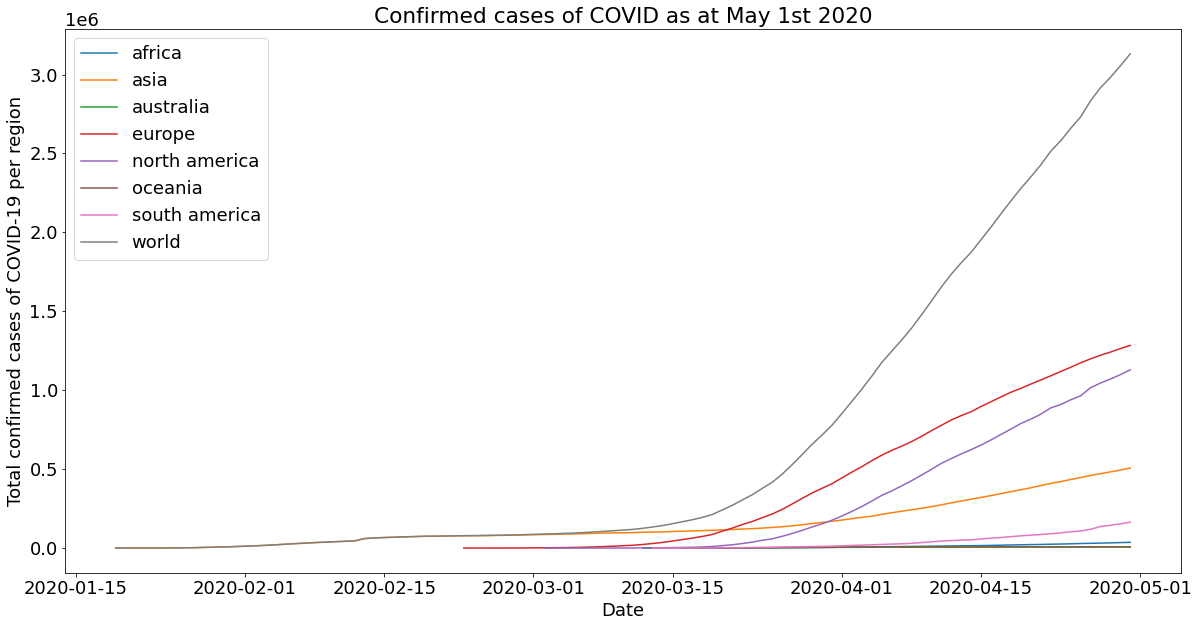

In [ ]:
plt.figure(figsize=(20,10))
for key, grp in df_Continents.groupby(['Entity']): 
  grp1 = grp['Total confirmed cases of COVID-19 (cases)']
  # y = grp1.cumsum()
  plt.plot(grp['Date'], grp1, label = key)
plt.legend(loc='best')    
plt.xlabel("Date")
plt.ylabel("Total confirmed cases of COVID-19 per region")
plt.title("Confirmed cases of COVID as at May 1st 2020")
plt.show()

With a focus on West African countries in the three graphs below, Cameroon, Ghana and Nigeria have the highest number of cases. The rest of the countries have a relatively lower number of confirmed cases with Guinea having the highest among the rest of the countries 

However, from the second graph, we see that Guinea is leading with the highest number of confirmed cases per million which shows that Guinea is more hard-hit than Cameroon. Also even though Nigeria has a high number of confirmed cases as at May 1st 2020, it has the lowest total number of confirmed cases per million.This is probably because if Nigeria's really large population size as compared to other African countries. 

From the third graph, Burkina Faso has the highest number of confirmed deaths due to COVID by May 1st 2020, even though it has a relatively lower number of cases and number of cases per million. Nigeria has the next highest number of deaths with Guinea having the lowest number of deaths.

[639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1460, 1461, 1462, 1463, 1464, 2000, 2001, 2002, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 3332]


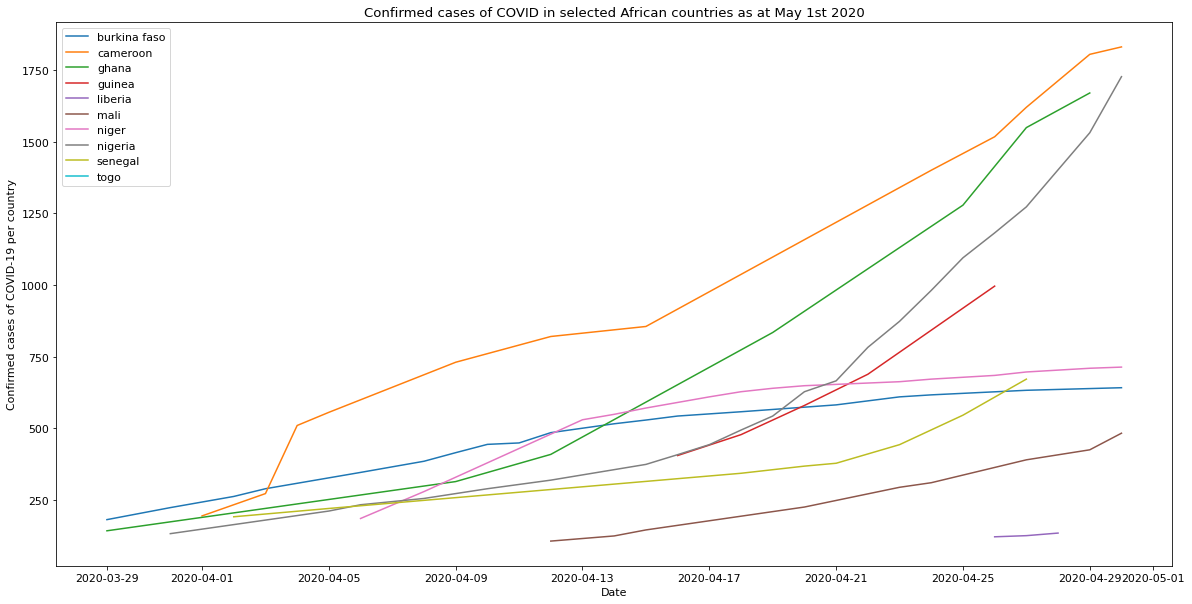

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 11})

#lowercase of each country name:
WestAfrica_list = [string.lower() for string in WestAfrica_list]
WAindexlist = []
counter = 0
for i in df_World['Entity']:
  if i in WestAfrica_list:
      WAindexlist.append(counter)
  counter +=1
print(WAindexlist)
#Extract those rows of the dataframe
df_WestAfrica = df_World.loc[WAindexlist]
df_WestAfrica.head()

for key, grp in df_WestAfrica.groupby(['Entity']): 
  grp1 = grp['Total confirmed cases of COVID-19 (cases)']
  # y = grp1.cumsum()
  plt.plot(grp['Date'], grp['Total confirmed cases of COVID-19 (cases)'], 
           label = key)
plt.legend(loc='best')    
plt.xlabel("Date")
plt.ylabel("Confirmed cases of COVID-19 per country")
plt.title("Confirmed cases of COVID in selected African countries as at May 1st 2020")
plt.show()

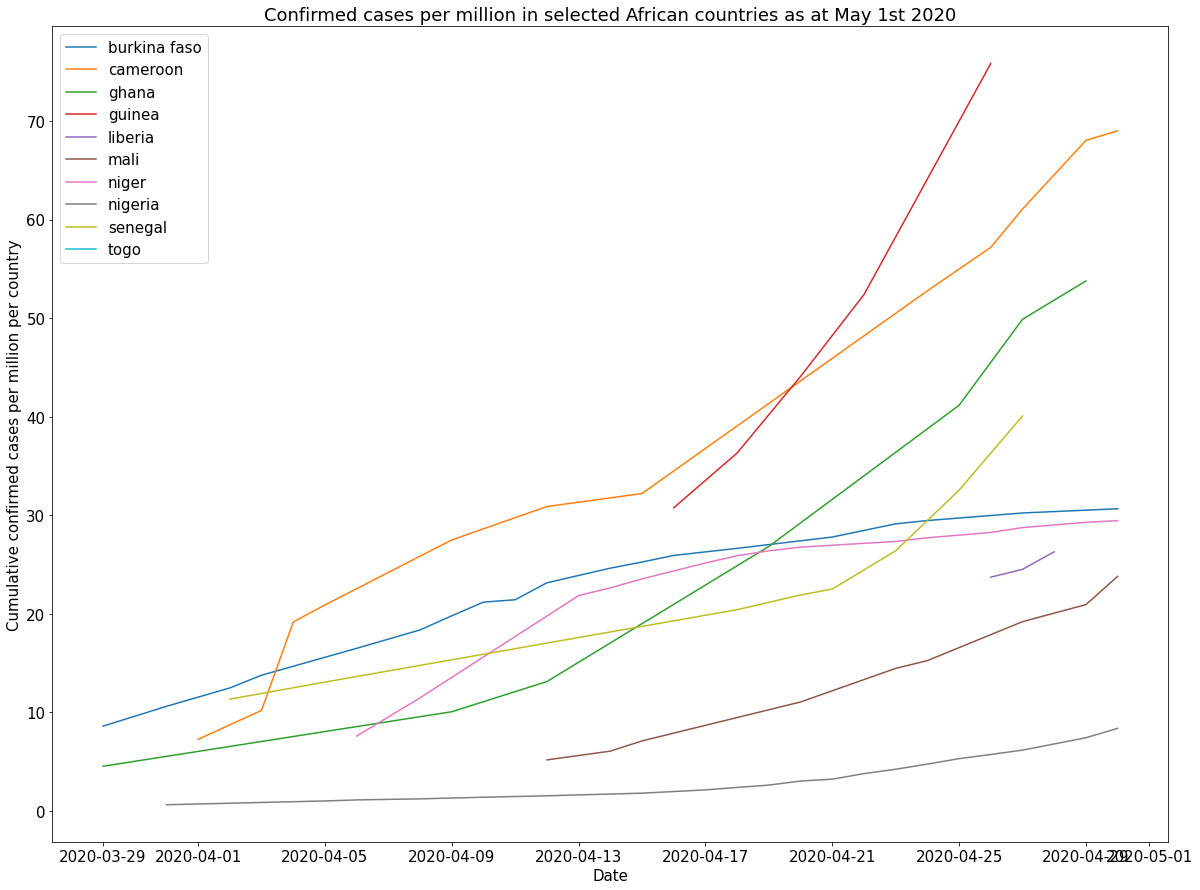

In [ ]:
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 15})
for key, grp in df_WestAfrica.groupby(['Entity']): 
  grp1 = grp['Total confirmed cases of COVID-19 per million people (cases per million)']
  # y = grp1.cumsum()
  plt.plot(grp['Date'], 
           grp['Total confirmed cases of COVID-19 per million people (cases per million)'],
           label = key)
plt.legend(loc='best')    
plt.xlabel("Date")
plt.ylabel("Cumulative confirmed cases per million per country")
plt.title("Confirmed cases per million in selected African countries as at May 1st 2020")
plt.show()

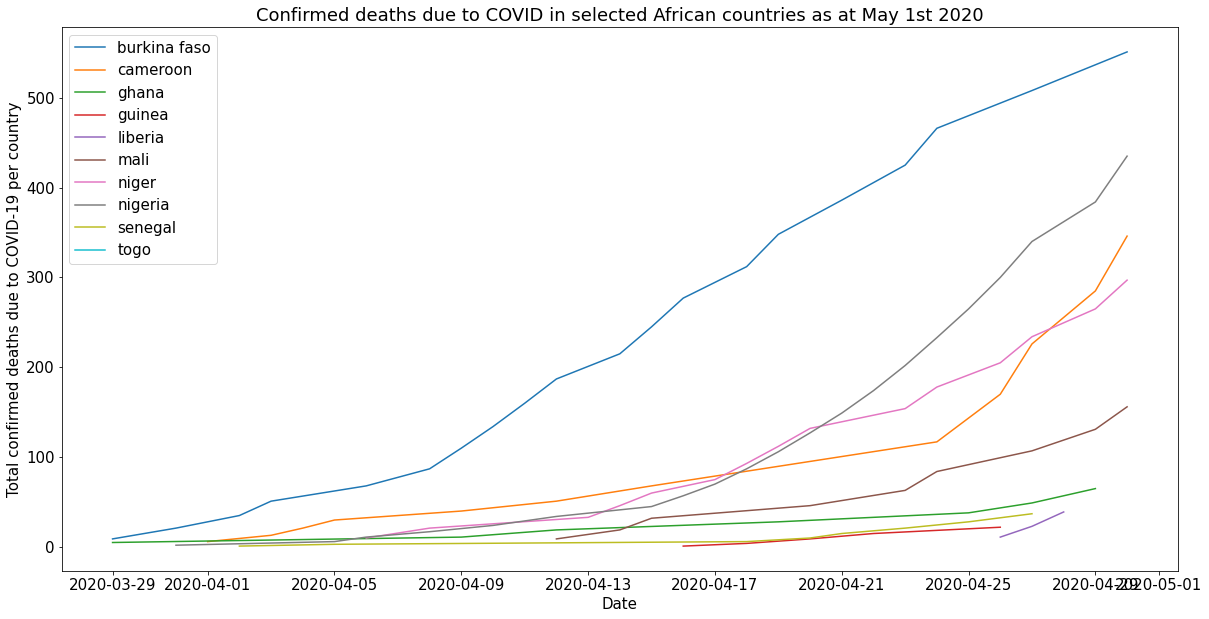

In [ ]:
plt.figure(figsize=(20,10))
for key, grp in df_WestAfrica.groupby(['Entity']): 
  grp1 = grp['Total confirmed deaths due to COVID-19 (deaths)_x']
  y = grp1.cumsum()
  plt.plot(grp['Date'],y, label = key)
plt.legend(loc='best')    
plt.xlabel("Date")
plt.ylabel("Total confirmed deaths due to COVID-19 per country")
plt.title("Confirmed deaths due to COVID in selected African countries as at May 1st 2020")
plt.show()

Comparing confirmed cases from the whole world to that of the African countries, we realise that both graphs have a somewhat exponential growth with more than 5,000 confirmed cases in the African countries and about 3,000,000 cases worldwide. 

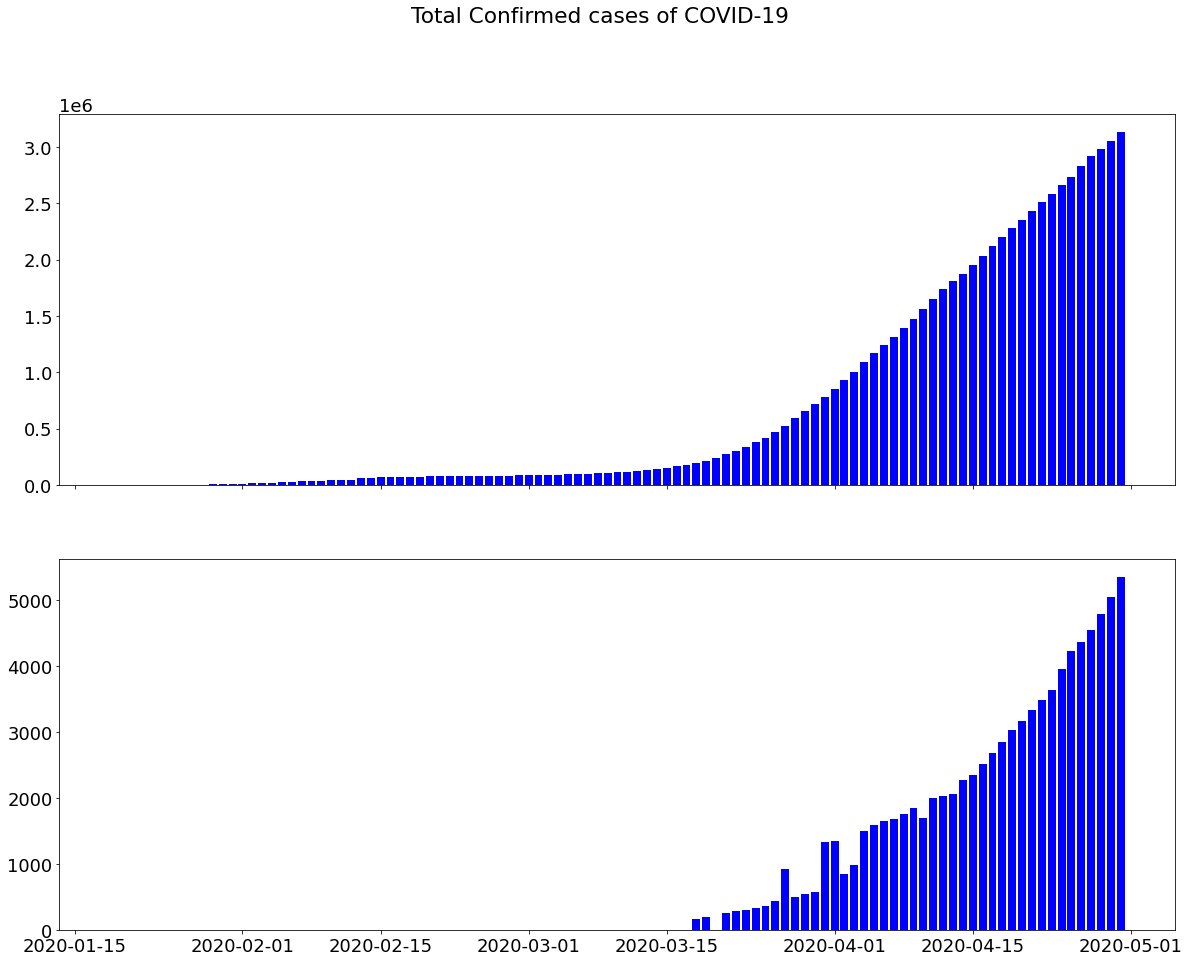

In [ ]:
# the whole world and africa only, sharing the same axes
plt.rcParams.update({'font.size': 18})
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20,15))
fig.suptitle('Total Confirmed cases of COVID-19')
for key, grp in df_World.groupby(['Date']):
  grp1 = grp['Total confirmed cases of COVID-19 (cases)']
  # y = grp1.cumsum()
  ax1.bar(grp["Date"], grp['Total confirmed cases of COVID-19 (cases)'], color="blue")
for key, grp in df_Africa.groupby(['Date']):
  grp1 = grp['Total confirmed cases of COVID-19 (cases)']
  # y = grp1.cumsum()
  ax2.bar(grp["Date"], grp1, color="blue")
# print(y)

Considering only the daily number of confirmed cases recorded worldwide and that for African countries, we realise that the graph for all countries looks like a sigmoid curve (ie. it looks S-shaped) which shows a somewhat decline in the number of daily confirmed COVID cases. The trend in daily confirmed cases for African countries currently does not fit any standard curves. 

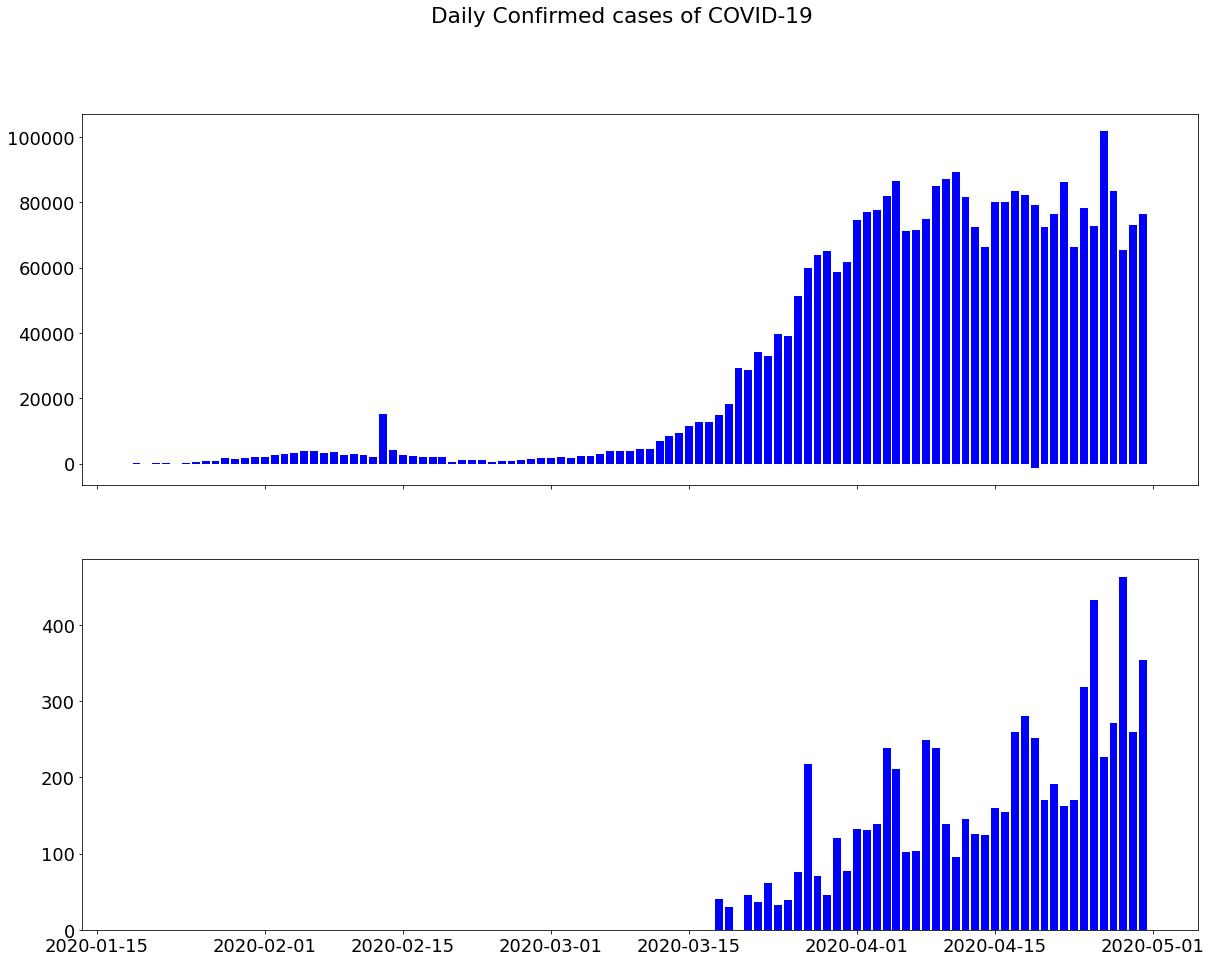

In [ ]:
#the whole world and africa only, sharing the same axes
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20,15))
fig.suptitle('Daily Confirmed cases of COVID-19')

for key, grp in df_World.groupby(['Date']):
  grp1 = grp['Daily confirmed cases (cases)']
  # y = grp1.cumsum()
  ax1.bar(grp["Date"], grp['Daily confirmed cases (cases)'], color = "blue")

for key, grp in df_Africa.groupby(['Date']):
  grp1 = grp['Daily confirmed cases (cases)']
  # y = grp1.cumsum()
  ax2.bar(grp["Date"], grp['Daily confirmed cases (cases)'], color="blue")

From the subplots below, we realise that the number of confirmed cases per million people, for the World and Africa increases at similar rates. However, taking out the odd peaks in the third subplot, we realise that the third subplot rises at a slower rate than that of the fourth subplot. The fourth subplot mimics a sigmoid curve. 

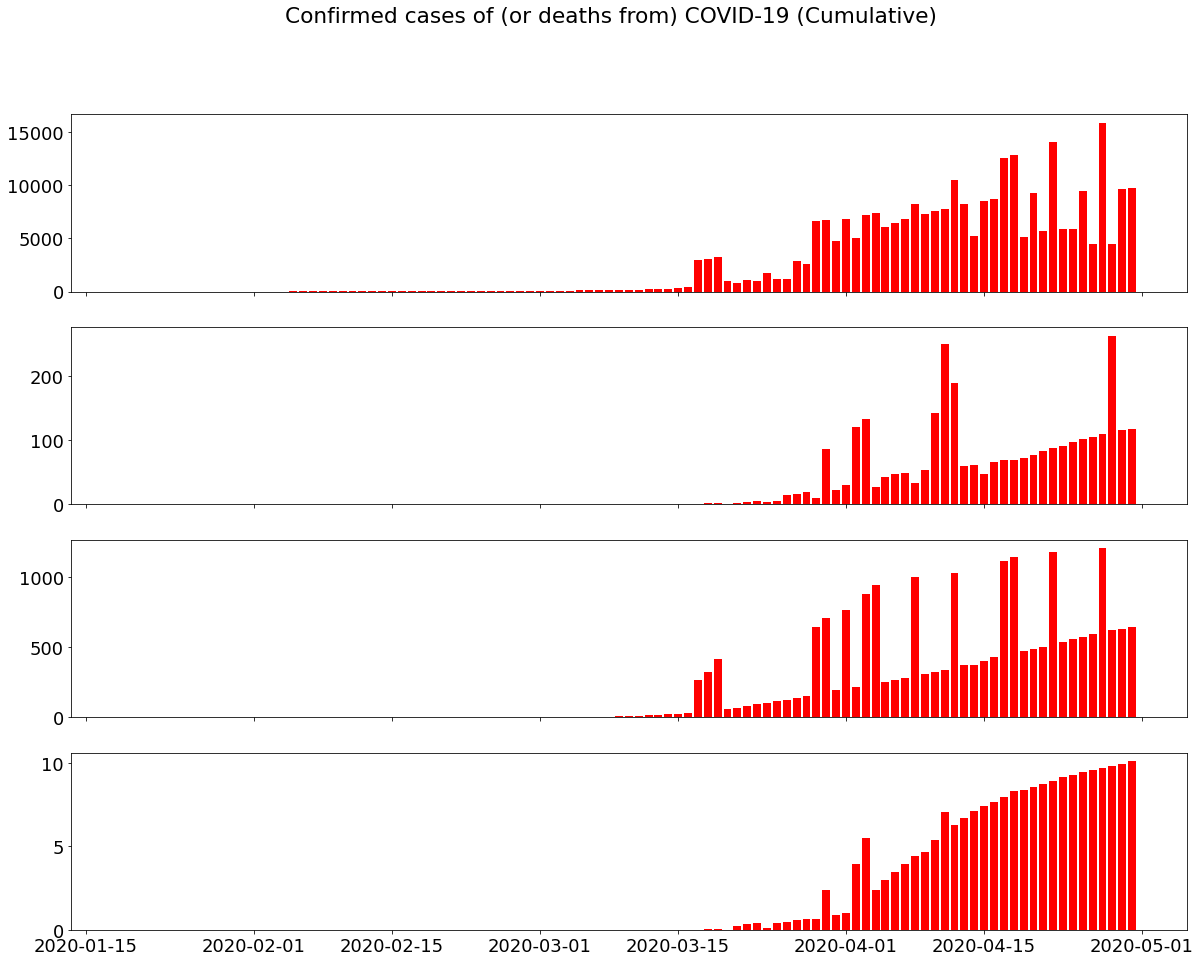

In [ ]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, sharex=True, figsize=(20,15))
fig.suptitle('Confirmed cases of (or deaths from) COVID-19 (Cumulative)')

for key, grp in df_World.groupby(['Date']):
  grp1 = grp['Total confirmed cases of COVID-19 per million people (cases per million)']
  ax1.bar(grp["Date"], grp1, color = "red")

for key, grp in df_Africa.groupby(['Date']):
  grp1 = grp['Total confirmed cases of COVID-19 per million people (cases per million)']
  ax2.bar(grp["Date"], grp1, color = "red")

for key, grp in df_World.groupby(['Date']):
  grp1 = grp['Total confirmed deaths due to COVID-19 per million people (deaths per million)']
  ax3.bar(grp["Date"], grp1, color = "red")

for key, grp in df_Africa.groupby(['Date']):
  grp1 = grp['Total confirmed deaths due to COVID-19 per million people (deaths per million)']
  ax4.bar(grp["Date"], grp1, color = "red")

The pie chart below shows the population distribution and population densities of the west african countries under study. We realize that Nigeria's population `(195,874,740 people)` forms 55.7% of the population of the countries under study and also has a relatively large population density. 

[1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 581

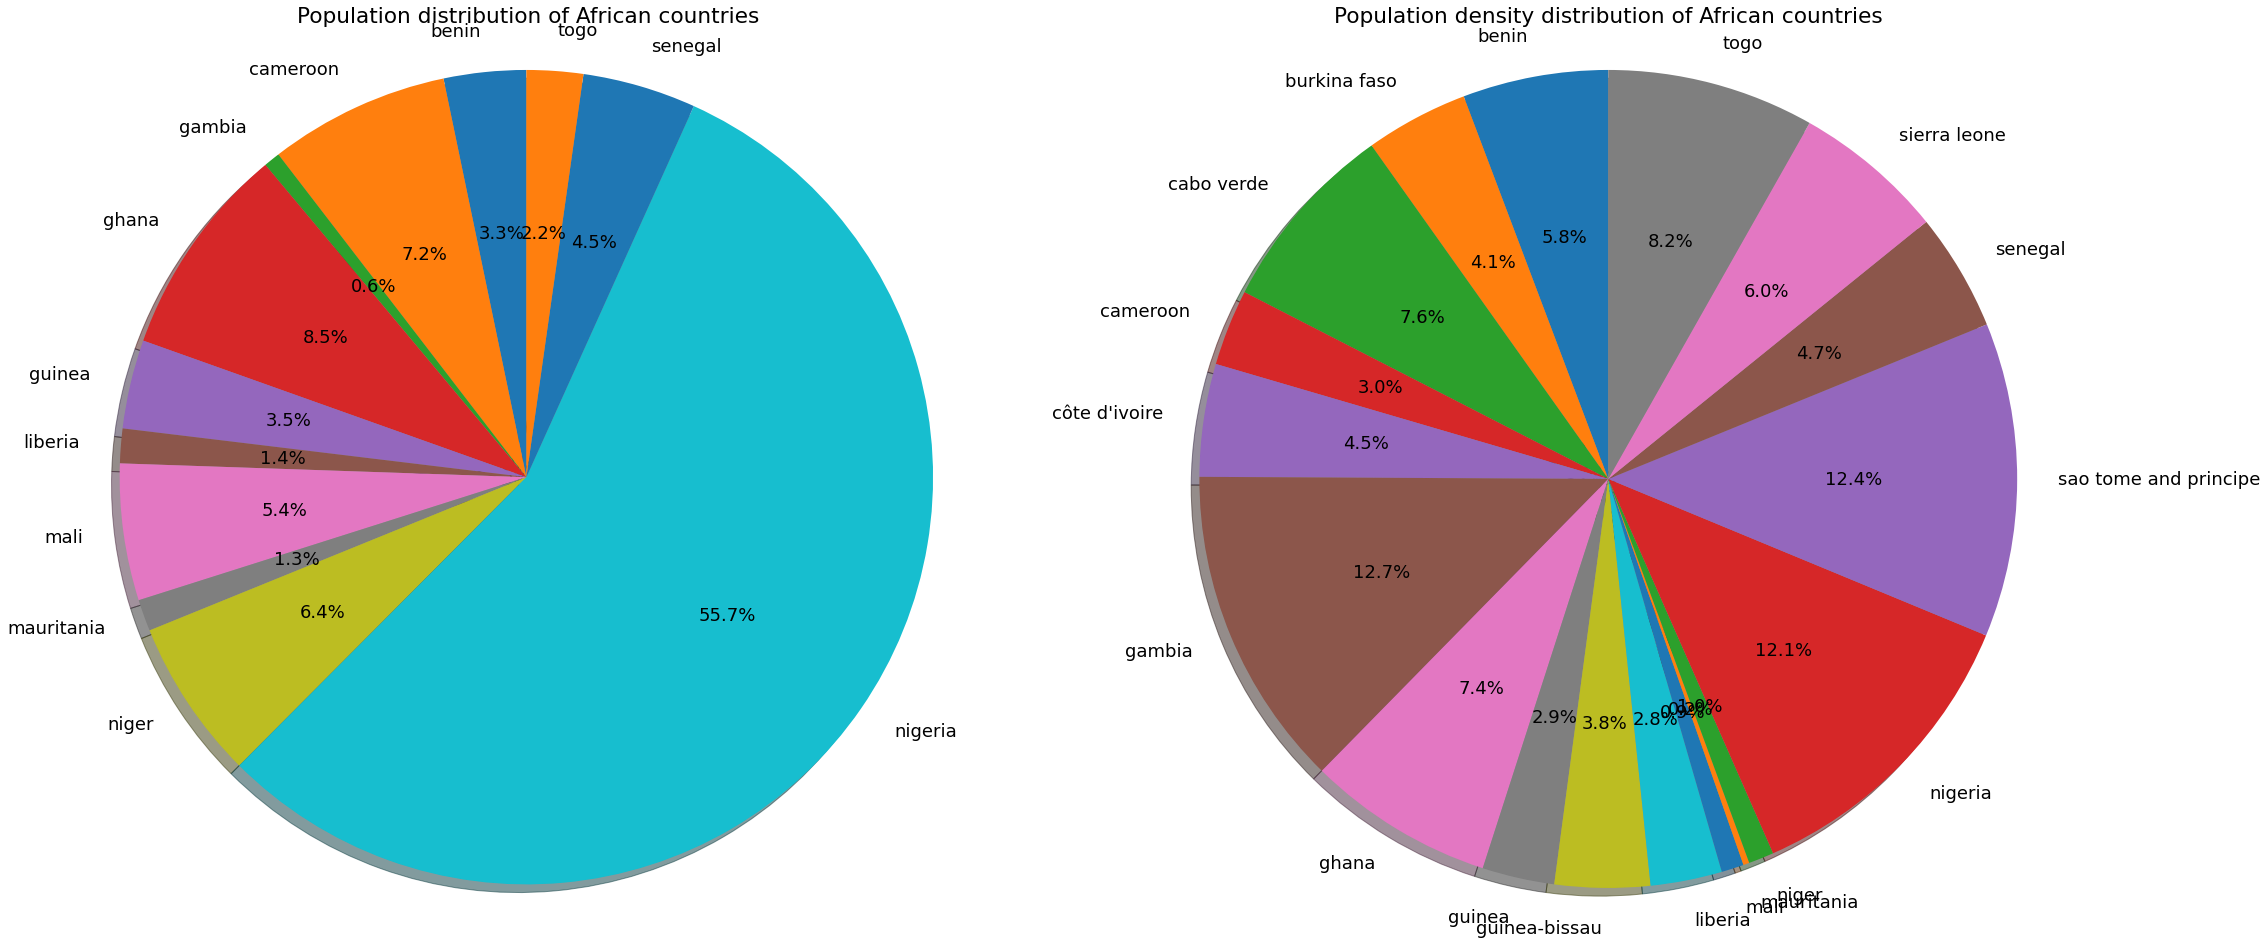

In [ ]:
#checking population distribution of the african countries under consideration
fig = plt.figure(figsize=(50,50))
#lowercase of each country name:
WestAfrica_list = [string.lower() for string in WestAfrica_list]
WAindexlist = []
counter = 0
for i in df_World_Cases_Pop['Country']:
  if i in WestAfrica_list:
      WAindexlist.append(counter)
  counter +=1
print(WAindexlist)
#Extract those rows of the dataframe
df_WestAfrica_Cases_Pop = df_World_Cases_Pop.loc[WAindexlist]
df_WestAfrica_Cases_Pop.head()

#choosing needed west african countries:
df4 = df_WestAfrica_Cases_Pop.loc[df_WestAfrica_Cases_Pop["popData2018"].isnull()]
df_WestAfrica_Cases_Pop = df_WestAfrica_Cases_Pop.drop(list(df4.index))
ctry_list =  df_WestAfrica_Cases_Pop["Country"].unique()
pop_list = df_WestAfrica_Cases_Pop["popData2018"].unique()
#labels: the west african countries under study
#size: the population
labels = ctry_list
sizes = pop_list
ax1 = fig.add_axes([0, 0, 0.25, 0.25], aspect=1)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#lowercase of each country name:
WestAfrica_list = [string.lower() for string in WestAfrica_list]
WAindexlist = []
counter = 0
for i in df_World_Indicators_Mega['country']:
  if i in WestAfrica_list:
      WAindexlist.append(counter)
  counter +=1
print(WAindexlist)
#Extract those rows of the dataframe
df_WestAfrica_Indicators_Mega = df_World_Indicators_Mega.loc[WAindexlist]
df_WestAfrica_Indicators_Mega.head()

#checking population density distribution of the west african countries under consideration 
#(however, this is 2010 data and not 2018 like above)
#choosing needed west african countries:
ctry_list = df_WestAfrica_Indicators_Mega["country"].unique()
pop_list = df_WestAfrica_Indicators_Mega["population_density"].unique()
#labels: the west african countries under study
#size: the population
labels = ctry_list
sizes = pop_list
ax2 = fig.add_axes([0.3, 0, 0.25, 0.25], aspect=1)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Population distribution of African countries')
ax2.set_title('Population density distribution of African countries')

plt.show()

From exploring the `df_World_Indicators_Mega` and `df_Africa_Indicators_Mega` dataframes, we realize that African countries have a much lower proportion, `25.64%`, of its population with basic handwashing facilities on premises while that for the world is `50.69%`.
In addition, African countries have about `4` physicians for every 100 patients while that of the world is averagely `17` physicians per every 100 patients. African countries' mean expenditure on health is also lower than that of the world's mean.

The population_living_in_urban_areas for the world is 58.25 while that for African countries is 46.61
The proportion_of_population_with_basic_handwashing_facilities_on_premises for the world is 50.69 while that for African countries is 25.64
The inform_access_to_healthcare for the world is 4.17 while that for African countries is 6.63
The physicians_density for the world is 17.12 while that for African countries is 3.69
The current_health_expenditure_per_capita for the world is 1352.91 while that for African countries is 308.75


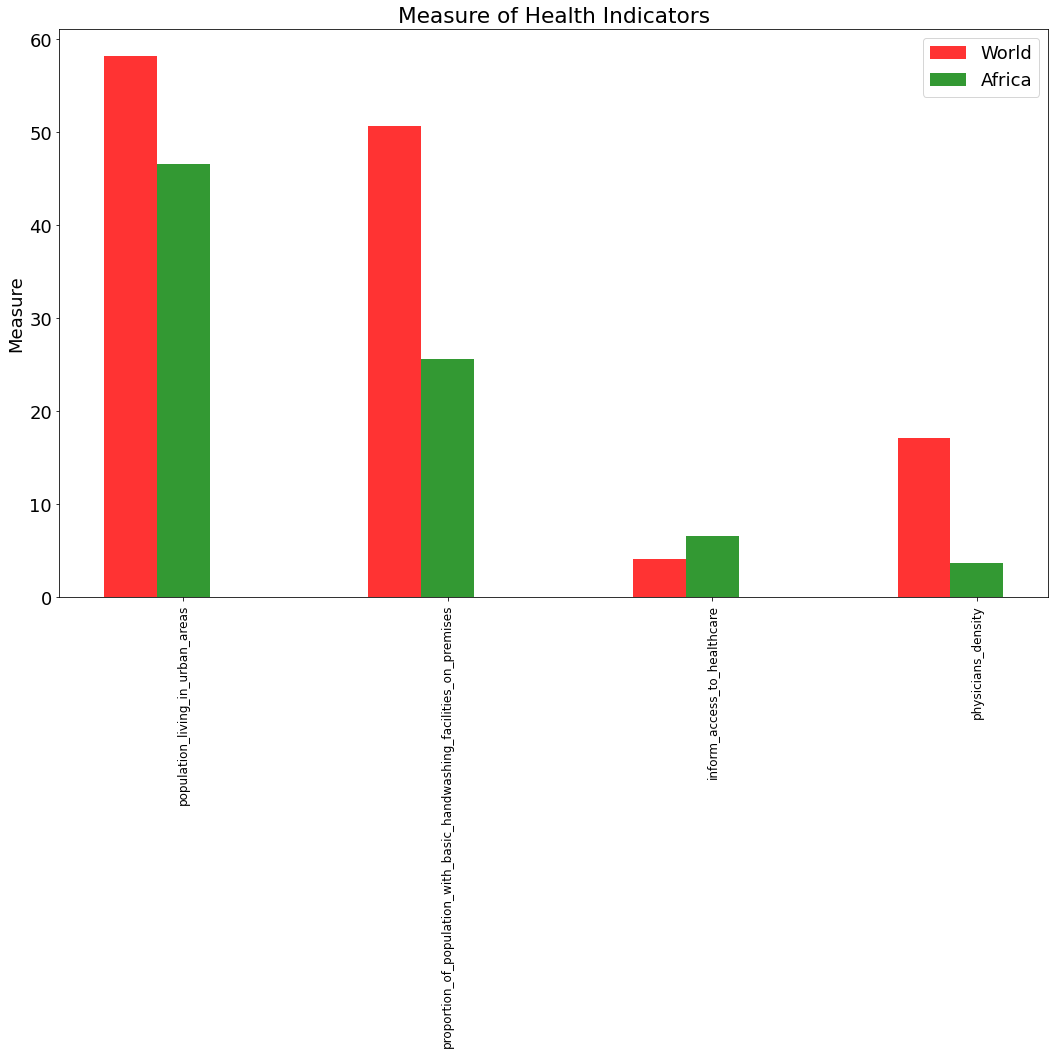

In [ ]:
alist1 = ["population_living_in_urban_areas","proportion_of_population_with_basic_handwashing_facilities_on_premises",
          "inform_access_to_healthcare","physicians_density","current_health_expenditure_per_capita"]
alist2 = [df_World_Indicators_Mega,df_Africa_Indicators_Mega]
for i in alist2:
  for j in alist1:
    i[j] = pd.to_numeric(i[j],errors='coerce')

alist3=[]
alist4=[]
for j in alist1:
    print("The", j, "for the world is", np.round(alist2[0][j].mean(),decimals = 2), 
          "while that for African countries is",np.round(alist2[1][j].mean(),decimals=2))
    alist3.append(np.round(alist2[0][j].mean(),decimals = 2))
    alist4.append(np.round(alist2[1][j].mean(),decimals=2))

# data to plot
groups = 4

# create plot
fig, ax = plt.subplots(figsize=(15,15))
index = np.arange(groups)
bar_width = 0.2
opacity = 0.8
rect1 = plt.bar(index, alist3[0:4], bar_width,alpha=opacity,color='r',label='World')
rect2 = plt.bar(index + bar_width, alist4[0:4], bar_width,alpha=opacity,color='g',label='Africa')
plt.xlabel('')
plt.ylabel('Measure')
plt.title('Measure of Health Indicators')
plt.xticks(index + bar_width, (alist1), rotation=90,fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#General NLTK function

In preparation for the NLTK process, I prepared an nltk function which takes in the target and feature variables as inputs including the two possibilities for the target variable.

The function does the following:
* convert class labels to binary values
* perform the following tasks on the feature set:
  * remove punctuations
  * replace whitespace between terms with a single space
  * remove leading training whitespaces
  * change words to lower case - Hello, HELLO, hello are all the same word!
  * replace normal numbers with "numbr"
  * remove stop words from additional info
  * remove word stems using a Porter stemmer
* create a bag of words
* print the total number of words and the five most common words
* use the first few most common words as features
* define a `find_features` function which finds features
* find features for all rows of dataframe
* do train-test-split
* train on the following models:
  * `K Nearest Neighbors`
  * `Decision Tree`
  * `Random Forest`
  * `Logistic Regression`
  * `SGD Classifier`
  * `Naive Bayes`
  * `SVN Linear`
* a voting classifier to combine all the algorithms, make decisions and produce an accuracy score
* produce a confusion matrix

In [ ]:
#whole nltk function
def nltk_func(target, feature, Yes, No):
    #check class distribution
    classes = target
    classes.value_counts() #more alive than approaching death therefore skewed class distribution
    #convert class labels to binary values #1 =  dead, 0 = alive
    encoder = LabelEncoder()
    Y = encoder.fit_transform(classes)
    classes[:10]
    #store the additional info data 
    additional_info = feature
    #remove punctuation
    processed = additional_info.str.replace(r"[^\w\d\s]"," ")
    #replace whitespace between terms with a single space
    processed = processed.str.replace(r"r'\s+", " ")
    #remove leading training whitespaces
    processed = processed.str.replace(r"^\s+|\s+?$","")
    #change words to loer case - Hello, HELLO, hello are all the same word!
    processed = processed.str.lower()
    #replace normal numbers with "numbr"
    processed = processed.str.replace(r"\d+(\.\d+)?","numbr")
    #remove stop words from additional info
    stop_words = set(stopwords.words("english"))
    processed = processed.apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
    #remove word stems using a Porter stemmer e.g. ing and ed for tenses, "i have"
    ps = nltk.PorterStemmer()
    processed = processed.apply(lambda x:" ".join(ps.stem(term) for term in x.split()))
    #creating a bag-of-words
    all_words =[]
    for message in processed:
      words = word_tokenize(message)
      for w in words:
        all_words.append(w)
    all_words = nltk.FreqDist(all_words)
    all_words
    #print the total number of words and the 5 most common words
    print("Number of words:{}".format(len(all_words)))
    print("Most common words: {}".format(all_words.most_common(5)))
    #use the 1500 most common words as features
    word_features = list(all_words.keys())[:]
    #define a find_features function
    def find_features(message):
      words = word_tokenize(message)
      features = {} #dictionary
      for word in word_features: #looping through the list 200 most common words
        features[word] = (word in words) 
      return features
    #find features for all messages
    messages = list(zip(processed, Y))
    #define a seed for reproducibility
    seed = 1
    np.random.seed = seed
    np.random.shuffle(messages) #shuffling text msgs just in case spam are at one place
    #call find_features function for each SMS messages
    featuresets = [(find_features(text), label) for (text,label) in messages]
    #split training and test data sets using sklearn
    # print(featuresets)
    # print(type(featuresets))
    training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, 
                                                        random_state=seed, shuffle = True)
    # print("here")
    print("Training: {}".format(len(training)))
    print("Testing: {}".format(len(testing)))
    # print(testing)
    #Define models to train
    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest",
            "Logistic Regression", "SGD Classifier", "Naive Bayes", "SVN Linear"]
    classifiers = [ KNeighborsClassifier(), DecisionTreeClassifier(),
                  RandomForestClassifier(), LogisticRegression(),
                  SGDClassifier(max_iter=100),MultinomialNB(), SVC(kernel = "linear")
                  ]
    models = list(zip(names, classifiers))
    # print(models) #to see parameters each model is using

    #wrap models in nltk 
    #train a lot of models and print accuracy etc for each one
    #more like a grid search?
    for name, model in models:
      nltk_model = SklearnClassifier(model)
      nltk_model.train(training)
      accuracy = nltk.classify.accuracy(nltk_model,testing)*100
      print('{}: Accuracy: {}'.format(name,accuracy))
    #build an ensemble method - Voting classifier where we combine all the algorithms
    #we have trained to make decisions
    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest",
            "Logistic Regression", "SGD Classifier", "Naive Bayes", "SVC Linear"]
    classifiers = [ KNeighborsClassifier(), DecisionTreeClassifier(),
                  RandomForestClassifier(), LogisticRegression(),
                  SGDClassifier(max_iter=100),MultinomialNB(), SVC(kernel = "linear")
                  ]
    models = list(zip(names, classifiers))
    nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models,voting ="hard", n_jobs=-1))
    #with hard voting, binary response. With soft voting, you get a prob that it belongs to a particular class
    nltk_ensemble.train(training)
    accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
    print()
    print('Ensemble Method Accuracy: {}'.format(accuracy)) 
    #the accuracy is much higher than for most other the individual models
    #make class label predictions for testing set
    txt_features, labels = zip(*testing)
    prediction = nltk_ensemble.classify_many(txt_features)
    #print a confusion matrix and a classification report
    print(classification_report(labels, prediction))
    print("CONFUSION MATRIX:")
    print(pd.DataFrame(confusion_matrix(labels, prediction), 
                index=[["actual", "actual"],[Yes,No]],
                columns = [["predicted", "predicted"],[Yes, No]]))
    return 

#Using NLTK to predict whether a COVID patient will eventually die or survive the pandemic (`outcome` and `additional_information` columns)

For this model, I focused on the `outcome` and `additional_information` columns.  

This is the process I used to prepare my model:
* I first prepared my NLTK model using non-african countries which I did by identifying the index of all rows that had african countries, and dropping them using `.drop()`. 
* I also dropped null rows of `df_World_Mega` using `.isnull()` and `.drop()`. I did these for the `outcome` and `additional_information` columns.
* For the `outcome` column, I then placed the unique entries into either `dead` or `alive`. In other words, I binarized this column.
* I then extracted the `outcome` and `additional_information` columns into a new dataframe: `nltk_outcome_df`
* I then entered the columns of these dataframes into the general nltk function.
* The nltk function also provided the accuracy level for the following types of models:
   * `K Nearest Neighbors, Accuracy: 81%`
   * `Decision Tree: Accuracy: 89%`
   * `Random Forest: Accuracy: 89%`
   * `Logistic Regression: Accuracy: 90%`
   * `SGD Classifier: Accuracy: 83%`
   * `Naive Bayes: Accuracy: 83%`
   * `SVN Linear: Accuracy: 88%`
* In the NLTK function, I then used the Ensemble method which is a voting classifier where I combined all the algorithms I trained to decide whether the outcome for each data point was "alive" or "dead".
* The ensemble method produced an accuracy of about `90%`. The confusion matrix is indicated in the output. 
* I then fit the data from african countries to this model, using the same method, and obtained an accuracy score of `90%`. The confusion matrix is indicated in the output. 

In [ ]:
#PREPARING NEEDED DATAFRAME(S) FOR NLTK PROCESS:
#outcome and additional info for non-african countries:
df_World_Mega["outcome"].unique()
df_World_Mega_edited = df_World_Mega.copy()
#drop all rows with african countries:
df_World_Mega_edited = df_World_Mega_edited.drop(list(df_Africa_Mega.index))   
df_World_Mega_edited.head()
#drop whole null rows in the 'outcome' column and "additional info column"
df4 = df_World_Mega_edited.loc[df_World_Mega_edited['outcome'].isnull()]
# df_World_Mega["outcome"].isnull().sum(), len(df_World_Mega)
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
df_World_Mega_edited.head()
df4 = df_World_Mega_edited.loc[df_World_Mega_edited['additional_information'].isnull()]
# df_World_Mega["additional_information"].isnull().sum(), len(df_World_Mega)
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
#alive
df_World_Mega_edited["outcome"].replace(['discharge', 'discharged', 'discharged from hospital',
          'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
          'released from quarantine','stable', 
          'symptoms only improved with cough. currently hospitalized for follow-up.',
          'treated in an intensive care unit (14.02.2020)', 'alive',
          'under treatment', 'receiving treatment', 'stable condition'],"alive", inplace= True)
#dead or near death
df_World_Mega_edited["outcome"].replace(['critical condition, intubated as of 14.02.2020','death',
                                            'severe illness', 'unstable','deceased',
                                            'critical condition', 'severe','dead', 'died',],"dead", inplace= True)
df_World_Mega_edited["outcome"].unique()
nltk_outcome_df = df_World_Mega_edited[["outcome","additional_information"]]
nltk_outcome_df

nltk_func(nltk_outcome_df["outcome"],nltk_outcome_df["additional_information"], 
          "dead", "alive") 

Number of words:390
Most common words: [('numbr', 469), ('case', 276), ('phnumbr', 127), ('hospit', 56), ('china', 45)]
Training: 331
Testing: 111
K Nearest Neighbors: Accuracy: 85.58558558558559
Decision Tree: Accuracy: 90.09009009009009
Random Forest: Accuracy: 90.09009009009009
Logistic Regression: Accuracy: 88.28828828828829
SGD Classifier: Accuracy: 88.28828828828829
Naive Bayes: Accuracy: 87.38738738738738
SVN Linear: Accuracy: 88.28828828828829

Ensemble Method Accuracy: 89.1891891891892
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        77
           1       0.76      0.94      0.84        34

    accuracy                           0.89       111
   macro avg       0.87      0.91      0.88       111
weighted avg       0.91      0.89      0.89       111

CONFUSION MATRIX:
             predicted      
                  dead alive
actual dead         67    10
       alive         2    32


In [ ]:
##############

#alive
df_Africa_Mega["outcome"].replace(['discharge', 'discharged', 'discharged from hospital',
          'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
          'released from quarantine','stable', 
          'symptoms only improved with cough. currently hospitalized for follow-up.',
          'treated in an intensive care unit (14.02.2020)', 'alive',
          'under treatment', 'receiving treatment', 'stable condition'],"alive", inplace= True)
#dead or near death
df_Africa_Mega["outcome"].replace(['critical condition, intubated as of 14.02.2020','death',
                                            'severe illness', 'unstable','deceased',
                                            'critical condition', 'severe','dead', 'died',],"dead", inplace= True)

# #drop all null additional info
df4 = df_Africa_Mega.loc[df_Africa_Mega['additional_information'].isnull()]
df_Africa_Mega = df_Africa_Mega.drop(list(df4.index))
df_Africa_Mega["additional_information"].value_counts()

#drop all null outcomes:
df4 = df_Africa_Mega.loc[df_Africa_Mega['outcome'].isnull()]
df_Africa_Mega = df_Africa_Mega.drop(list(df4.index))
df_Africa_Mega["outcome"].value_counts()

nltk_outcome_df_africa = df_Africa_Mega[["outcome","additional_information"]]
nltk_outcome_df_africa

X_africa = nltk_outcome_df_africa["additional_information"]
y_africa = nltk_outcome_df_africa["outcome"]

#create dummy rows
df5 = nltk_outcome_df_africa.loc[nltk_outcome_df_africa['outcome']== "dead"]
for i in range(10):
  nltk_outcome_df_africa = nltk_outcome_df_africa.append(df5, ignore_index=True)
df5 = nltk_outcome_df_africa.loc[nltk_outcome_df_africa['outcome']== "alive"]
for i in range(1):
  nltk_outcome_df_africa = nltk_outcome_df_africa.append(df5, ignore_index=True)


nltk_func(nltk_outcome_df_africa["outcome"],nltk_outcome_df_africa["additional_information"], "dead", "alive") 

###############


Number of words:39
Most common words: [('citizen', 26), ('travel', 15), ('gambia', 13), ('french', 13), ('bangladeshi', 11)]
Training: 30
Testing: 10
K Nearest Neighbors: Accuracy: 100.0
Decision Tree: Accuracy: 100.0
Random Forest: Accuracy: 100.0
Logistic Regression: Accuracy: 100.0
SGD Classifier: Accuracy: 40.0
Naive Bayes: Accuracy: 100.0
SVN Linear: Accuracy: 100.0

Ensemble Method Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

CONFUSION MATRIX:
             predicted      
                  dead alive
actual dead          2     0
       alive         0     8


# Using NLTK model to predict whether a COVID patient had a chronic disease or not depending on the outcome of the patient (`chronic_disease_binary` and `outcome`)

For this model, I focused on the `outcome` and `chronic_disease_binary` columns.

This is the process I used to prepare my model: 
* I dropped all rows of the dataframe with data on african countries, using `.drop()`.
* I dropped all empty rows of the `outcome` and `chronic_disease_binary` columns of the dataframe 
* I then extracted these columns into a new dataframe and passed the new dataframe to the `nltk_func` function.
* I used the same models as above and the ensemble method produced an accuracy score of `93.5%`.

In [ ]:
#PREPARING NEEDED DATAFRAME(S) FOR NLTK PROCESS:
#outcome and additional info for non-african countries:
df_World_Mega["outcome"].unique()
df_World_Mega_edited = df_World_Mega.copy()
#drop all rows with african countries:
df_World_Mega_edited = df_World_Mega_edited.drop(list(df_Africa_Mega.index))   
df_World_Mega_edited.head()
#drop whole null rows in the 'outcome' column and "additional info column"
df4 = df_World_Mega_edited.loc[df_World_Mega_edited['outcome'].isnull()]
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
df4 = df_World_Mega_edited.loc[df_World_Mega_edited["chronic_disease_binary"].isnull()]
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
df_World_Mega_edited["chronic_disease_binary"].replace("1.0","1", inplace= True)
df_World_Mega_edited["chronic_disease_binary"].replace("0.0","0", inplace= True)
df5 = df_World_Mega_edited.loc[df_World_Mega_edited['chronic_disease_binary']== "0"]
for i in range(10):
  df_World_Mega_edited = df_World_Mega_edited.append(df5, ignore_index=True)
df_World_Mega_edited["chronic_disease_binary"].value_counts()

1    99
0    22
Name: chronic_disease_binary, dtype: int64

In [ ]:
nltk_outcome_df = df_World_Mega_edited[["outcome","chronic_disease_binary","country"]]
nltk_outcome_df
nltk_func(nltk_outcome_df["chronic_disease_binary"], nltk_outcome_df["outcome"],
          "Chronic Disease", "No Chronic Disease") #target is chronic_disease_binary and feature is outcome

Number of words:6
Most common words: [('die', 72), ('discharg', 30), ('recov', 12), ('death', 4), ('stabl', 2)]
Training: 90
Testing: 31
K Nearest Neighbors: Accuracy: 96.7741935483871
Decision Tree: Accuracy: 96.7741935483871
Random Forest: Accuracy: 96.7741935483871
Logistic Regression: Accuracy: 96.7741935483871
SGD Classifier: Accuracy: 96.7741935483871
Naive Bayes: Accuracy: 96.7741935483871
SVN Linear: Accuracy: 96.7741935483871

Ensemble Method Accuracy: 96.7741935483871
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.96      0.98        28

    accuracy                           0.97        31
   macro avg       0.88      0.98      0.92        31
weighted avg       0.98      0.97      0.97        31

CONFUSION MATRIX:
                                predicted                   
                          Chronic Disease No Chronic Disease
actual Chronic Disease                  3         

#Using NLTK model to predict whether a COVID patient will eventually die or survive the pandemic, dependent on symptoms recorded (`symptoms` and `outcome`)

For this model, I focused on the `outcome` and `symptoms` columns.

This is the process I used to prepare my model: 
* I dropped all rows of the dataframe with data on african countries, using `.drop()`.
* I dropped all empty rows of the `outcome` and `symptoms` columns of the dataframe 
* I then extracted these columns into a new dataframe and passed the new dataframe to the `nltk_func` function.
* I used the same models as above and the ensemble method produced an accuracy of `91.3%`.

In [ ]:
#PREPARING NEEDED DATAFRAME(S) FOR NLTK PROCESS:
#alive
df_World_Mega["outcome"].replace(['discharge', 'discharged', 'discharged from hospital',
          'not hospitalized', 'recovered', 'recovering at home 03.03.2020',
          'released from quarantine','stable', 
          'symptoms only improved with cough. currently hospitalized for follow-up.',
          'treated in an intensive care unit (14.02.2020)', 'alive',
          'under treatment', 'receiving treatment', 'stable condition'],"alive", inplace= True)
#dead or near death
df_World_Mega["outcome"].replace(['critical condition, intubated as of 14.02.2020','death',
                                            'severe illness', 'unstable','deceased',
                                            'critical condition', 'severe','dead', 'died',],"dead", inplace= True)

#outcome and additional info for non-african countries:
df_World_Mega["outcome"].unique()
df_World_Mega_edited = df_World_Mega.copy()
#drop all rows with african countries:
df_World_Mega_edited = df_World_Mega_edited.drop(list(df_Africa_Mega.index))   
df_World_Mega_edited.head()
df_World_Mega["outcome"].unique()
#drop whole null rows in the 'outcome' column and "symptoms"
df4 = df_World_Mega_edited.loc[df_World_Mega_edited['outcome'].isnull()]
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
df4 = df_World_Mega_edited.loc[df_World_Mega_edited["symptoms"].isnull()]
df_World_Mega_edited = df_World_Mega_edited.drop(list(df4.index))
#evict urls
urls = ['https://twitter.com/airnewsalerts/status/1239796624928444416?s=19',
       'https://arogya.maharashtra.gov.in/1175/novel--corona-virus',
       'https://www.livemint.com/news/india/kerala-reports-14-new-corona-cases-state-tally-at-105-11585058837568.html',
       'https://twitter.com/pti_news/status/1243579676976701440?s=19',
       'https://twitter.com/ani/status/1245581420484907008',
       'http://www.nhmharyana.gov.in/writereaddata/userfiles/file/coronavirus/media%20bulletin%20morning%2002042020.pdf',
       'https://twitter.com/ani/status/1245683220550537216',
       'https://twitter.com/aninewsup/status/1245669255510519808',
       'https://twitter.com/diprjk/status/1245667080038318081',
       'http://www.nhmharyana.gov.in/writereaddata/userfiles/file/coronavirus/bulletin,%20evening02042020.pdf',
       'https://twitter.com/arogyaandhra/status/1245672975895916544',
       'https://twitter.com/ani/status/1245692712986214400',
       'https://twitter.com/ani/status/1245693514500804609',
       'https://twitter.com/arogyaandhra/status/1245703344796000261',
       'https://twitter.com/ani/status/1245727826017423362',
       'https://twitter.com/ani/status/1245735871996813312?s=19',
       'https://twitter.com/arogyaandhra/status/1245756334718349312',
       'https://twitter.com/ani/status/1245755522671726593',
       'https://twitter.com/ians_india/status/1245752808172695552',
       'https://twitter.com/pti_news/status/1245788511199825920',
       'https://www.jipmer.edu.in/novel-corona-virus',
       'https://twitter.com/arogyaandhra/status/1245941890563723264',
       'https://twitter.com/aninewsup/status/1245971315019763718',
       'http://www.nhmharyana.gov.in/writereaddata/userfiles/file/coronavirus/media%20bulletin%20morning%2003042020.pdf',
       'http://www.rajswasthya.nic.in/',
       'https://twitter.com/ani/status/1246038578699751424',
       'https://twitter.com/ani/status/1246043856447176704',
       'https://twitter.com/ani/status/1246044843048087553',
       'http://dhs.kerala.gov.in/wp-content/uploads/2020/04/daily-bulletin-hfwd-english-april-3rd.pdf',
       'https://twitter.com/hfwodisha/status/1246066255779393539',
       'https://twitter.com/pibjaipur/status/1246074152840093697',
       'http://www.nhmharyana.gov.in/writereaddata/userfiles/file/coronavirus/bulletin%20evening03042020.pdf',
       'https://twitter.com/pti_news/status/1246097072761081856',
       'https://twitter.com/pti_news/status/1246102107083534337',
       'https://twitter.com/ani/status/1246101940582461440',
       'https://www.thehindu.com/news/national/other-states/covid-19-8-more-test-positive-in-jk-one-in-ladakh/article31239538.ece',
       'https://twitter.com/arogyaandhra/status/1246126340329230336',
       'https://twitter.com/jansamparkmp/status/1246116249026715649',
       'https://twitter.com/hfwodisha/status/1246131083839561728',
       'state bulletin',
       'https://twitter.com/pibjaipur/status/1246275225559261184',
       'https://twitter.com/pibjaipur/status/1246298331766120448',
       'https://twitter.com/arogyaandhra/status/1246315515418533888',
       'http://www.nhmharyana.gov.in/writereaddata/userfiles/file/coronavirus/meida%20bulletin%2004042020%20evening.pdf',
       'https://twitter.com/diprjk/status/1246412229072670721',
       'https://twitter.com/ani/status/1246412467447554049',
       'https://twitter.com/ani/status/1246418320057708545',
       'https://twitter.com/arogyaandhra/status/1246417016702906369',
       'https://twitter.com/rajeshtope11/status/1246482154852253697',
       'https://twitter.com/ani/status/1246738428370223104',
       'https://twitter.com/ani/status/1246732221647552512?s=09',
       'https://twitter.com/ani/status/1246772859214667776',
       'https://twitter.com/ani/status/1246793618855096320',
       'https://twitter.com/ani/status/1246797969447219201',
       'https://www.mohfw.gov.in/', 'https://t.me/c/1428198946/1457',
       'https://twitter.com/telanganahealth/status/1246864939194646528?s=19',
       'https://twitter.com/arogyaandhra/status/1247036220556709896',
       'https://twitter.com/collectordnh/status/1246841816940331009',
       'https://twitter.com/ani/status/1247133356879314945',
       'https://t.me/indiacovid/1843',
       'https://twitter.com/ani/status/1250448348080943104?s=09',
       'https://twitter.com/cmodelhi/status/1250468383868350469',
       'https://twitter.com/ani/status/1250458699140698112',
       'https://t.me/indiacovid/2381',
       'https://twitter.com/ani/status/1250630770311360512',
       'https://twitter.com/pti_news/status/1250622842305040384',"mohfw.gov.in" ]
df_World_Mega_edited = df_World_Mega_edited[~df_World_Mega_edited["outcome"].isin(urls)]

df_World_Mega_edited["outcome"].unique()
nltk_outcome_df2 = df_World_Mega_edited[["outcome","symptoms","country"]]
nltk_outcome_df2
nltk_func( nltk_outcome_df2["outcome"],nltk_outcome_df2["symptoms"],
          "dead", "alive") #target is chronic_disease_binary and feature is outcome

Number of words:80
Most common words: [('fever', 91), ('cough', 65), ('pneumonia', 45), ('acut', 37), ('respiratori', 36)]
Training: 137
Testing: 46
K Nearest Neighbors: Accuracy: 73.91304347826086
Decision Tree: Accuracy: 80.43478260869566
Random Forest: Accuracy: 84.78260869565217
Logistic Regression: Accuracy: 84.78260869565217
SGD Classifier: Accuracy: 86.95652173913044
Naive Bayes: Accuracy: 76.08695652173914
SVN Linear: Accuracy: 80.43478260869566

Ensemble Method Accuracy: 80.43478260869566
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       1.00      0.67      0.80        27

    accuracy                           0.80        46
   macro avg       0.84      0.83      0.80        46
weighted avg       0.87      0.80      0.80        46

CONFUSION MATRIX:
             predicted      
                  dead alive
actual dead         19     0
       alive         9    18


#Exploring models through visualisations

I did the following visualisations: 
* I made a visual representation of the mean number of days elasped before the first COVID case was detected right after the first government measures were made. This showed that Mauritius, Botswana, Benin, Angola, Kenya and South Africa instituted government measures after the first COVID case was confirmed. Mauritius instituted government measures about `55` days after the first COVID case was confirmed in the country. Sierra Leone instituted government measures about `18` days before the first COVID cases was detected.
* The most popular government measure introduced was `social distancing`.


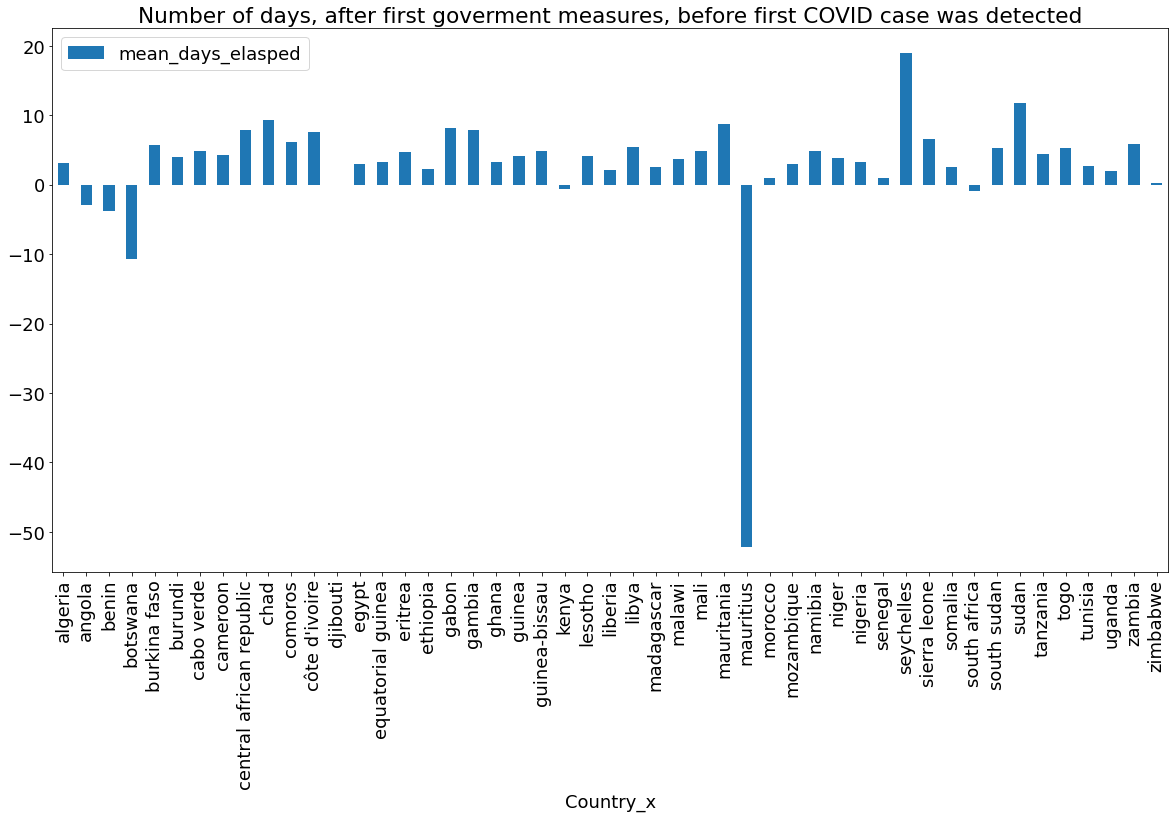

In [ ]:
#findings how many days, after government measures, that the virus entered the country
#how does this bar relate to those who have the most cases?
df_Africa_Gov_Measures["Date"] = pd.to_datetime(df_Africa_Gov_Measures["Date"])
df_Africa_Gov_Measures["entry_date"] = pd.to_datetime(df_Africa_Gov_Measures["entry_date"])

df_Africa_Gov_Measures["days_elasped"] = df_Africa_Gov_Measures["entry_date"] - df_Africa_Gov_Measures["Date"]
df_Africa_Gov_Measures_grouped = df_Africa_Gov_Measures.groupby('Country')["days_elasped"].sum()
df_Africa_Gov_Measures_grouped = pd.DataFrame(df_Africa_Gov_Measures_grouped).reset_index()
valuecounts_df = pd.DataFrame(df_Africa_Gov_Measures["Country"].value_counts()).reset_index()
df_Africa_Gov_Measures_grouped= pd.merge(df_Africa_Gov_Measures_grouped,
                                             valuecounts_df, left_on=["Country"], right_on=["index"])
df_Africa_Gov_Measures_grouped['days_elasped'] = df_Africa_Gov_Measures_grouped['days_elasped'].dt.days.astype('int16')
df_Africa_Gov_Measures_grouped["mean_days_elasped"] = df_Africa_Gov_Measures_grouped["days_elasped"]/df_Africa_Gov_Measures_grouped["Country_y"]
df_Africa_Gov_Measures_grouped

df_Africa_Gov_Measures_grouped.plot(kind='bar',x='Country_x',y='mean_days_elasped',
                                    figsize = (20,10),title = "Number of days, after first goverment measures, before first COVID case was detected" )

In [ ]:
#most common type of government measures done per country
df_World_Gov_Measures["comments"].unique()
df_Africa_Gov_Measures["comments"].unique()
# df_Africa_Gov_Measures_grouped2 = df_Africa_Gov_Measures.groupby(['Country','category'])["category"].count()
df_Africa_Gov_Measures_grouped2 = df_Africa_Gov_Measures.groupby(['Country'])["category"].max()
pd.DataFrame(df_Africa_Gov_Measures_grouped2).reset_index().groupby(["category"]).count()

,Country
category,
public health measures,2
social distancing,47


#Using exponential and logistic models to predict when the COVID curve will flatten in selected African countries

I used exponential and logistic models to study the data on confirmed cases of COVID in African countries including predicting when the curve will flatten for each African country under study. Below are the processes used and the findings:

1. Cumulated for all Africa countries:
* I defined a function for the logistic model which took an estimation of the following parameters:
  * `infection speed`
  * `day when maximum infection occurred`
  * `total number of recorded infected people at the infection's end`
* The exponential function did not appropriately represent the data and suggested that the total number of confirmed cases will decrease indefinitely, which is rather unrealistic.


2. Individually for each African country under study:
* I then used the same process and obtained the information below on when the curve flattens, for the graphs where the logistic model *appropriately* fit with the data. This is displayed in the cell and the values are below:
  * EGYPT: 208 days after January 1st 2020
  * ALGERIA: 185 days after January 1st 2020
  * MOROCCO: 195 days after January 1st 2020
  * TUNISIA: 156 days after January 1st 2020
  * BURKINA FASO: 159 days after January 1st 2020
  * GHANA: 207 days after January 1st 2020
  * COTE D'IVOIRE 158: days after January 1st 2020
  * KENYA: 296 days after January 1st 2020
  * MALI: 192 days after January 1st 2020
  * SOMALIA: 153 days after January 1st 2020

As evidenced in the visualisations, some logistic models did not *appropriately* fit the data for some countries but fit quite well for some other countries. 























/usr/local/lib/python3.6/dist-packages/scipy/optimize/_lsq/common.py:117: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm


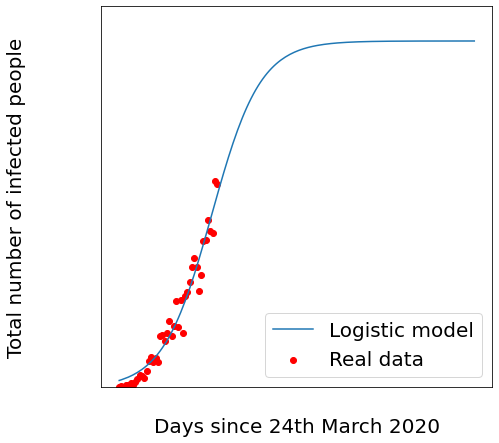

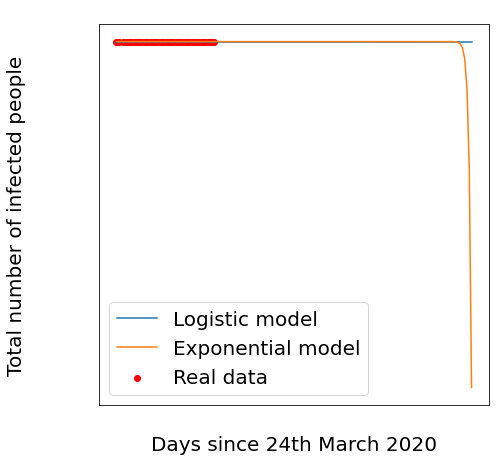

In [ ]:
#1. Data Preparation
#sum number of cases in the countries by date
extrapolate_Africa_cases = pd.DataFrame(df_Africa.groupby(['Date'])["Total confirmed cases of COVID-19 (cases)"].sum()) #summed number of cases per day
extrapolate_Africa_cases = extrapolate_Africa_cases.add_suffix('Count').reset_index() #changed groupby to a dataframe
extrapolate_Africa_cases["Total confirmed cases of COVID-19 (cases)"] = extrapolate_Africa_cases.Date.dt.strftime('%Y-%m-%d %H:%M:%S')
extrapolate_Africa_cases

FMT = '%Y-%m-%d %H:%M:%S'
extrapolate_Africa_cases['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) #change date to string objects first
extrapolate_Africa_cases.rename(columns={"Total confirmed cases of COVID-19 (cases)Count": "cases",
                                              "Total confirmed cases of COVID-19 (cases)": "date_str"}, inplace=True) #rename needed column
date = extrapolate_Africa_cases["date_str"] #store dates column                                              
extrapolate_Africa_cases['date_str'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days)
extrapolate_Africa_cases = extrapolate_Africa_cases.drop(columns=['Date'])

#2. Analyse using logistic model
#define the model
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a)) 
#a refers to the infection speed
# b is the day with the maximum infections occurred
# c is the total number of recorded infected people at the infection’s end

#estimate the parameter values and errors starting from the original data.
x = list(extrapolate_Africa_cases.iloc[:,1])
y = list(extrapolate_Africa_cases.iloc[:,0])
fit = curve_fit(logistic_model,x,y,p0=[2,100,20000], maxfev=10000)
fit #gives values of a, b and c and the covariance matrix
fit = list(fit)
a = list(fit[0])[0]
b = list(fit[0])[1]
c = list(fit[0])[2]
cov_matrix = list(fit[1])

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]] #gives standard error of a, b and c
errors
#The expected number of infected people at infection end is c +/- error[2].
#the infection will peak around ....?

sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b)) #finding the day when infection will end 
sol

#3. Analyse using exponential model
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1],method = "trf")
exp_fit = list(exp_fit)
#parameters and standard errors
a_exp = list(exp_fit[0])[0]
b_exp = list(exp_fit[0])[1]
c_exp = list(exp_fit[0])[2]
cov_matrix = list(exp_fit[1])


#4. Plot!
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=20)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.legend()
plt.xlabel("Days since 24th March 2020")
plt.ylabel("Total number of infected people")
plt.tick_params(colors='w')
plt.ylim(min(y)*0.9,fit[0][2]*1.1)
plt.show()

#5. Plot!
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=20)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 24th March 2020")
plt.ylabel("Total number of infected people")
plt.tick_params(colors='w')
plt.show()

COVID is predicted to end in EGYPT 208 days after January 1st 2020


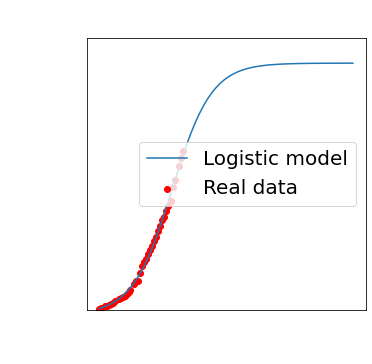

COVID is predicted to end in ALGERIA 185 days after January 1st 2020


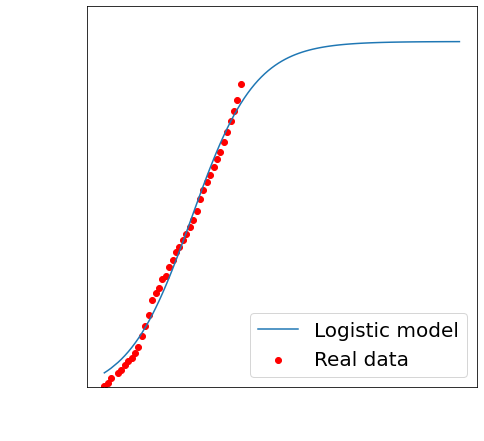

COVID is predicted to end in MOROCCO 195 days after January 1st 2020


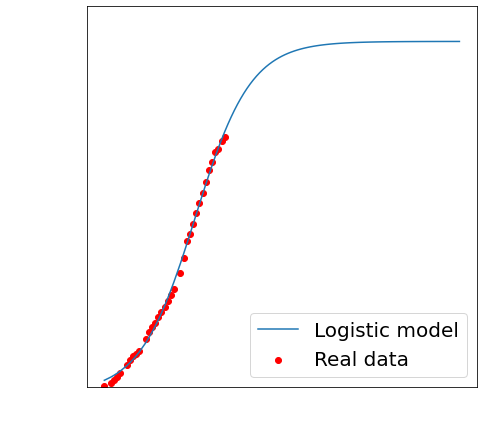

COVID is predicted to end in TUNISIA 156 days after January 1st 2020


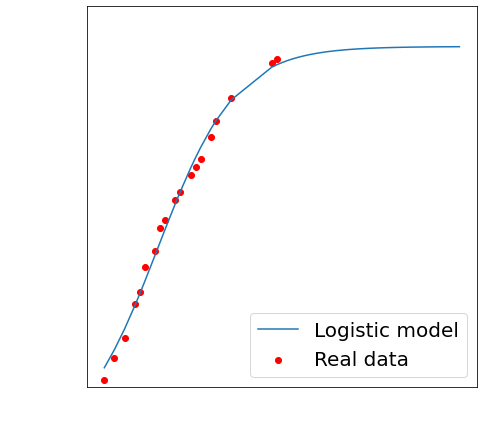


COVID is predicted to end in SOUTH AFRICA 156 days after January 1st 2020


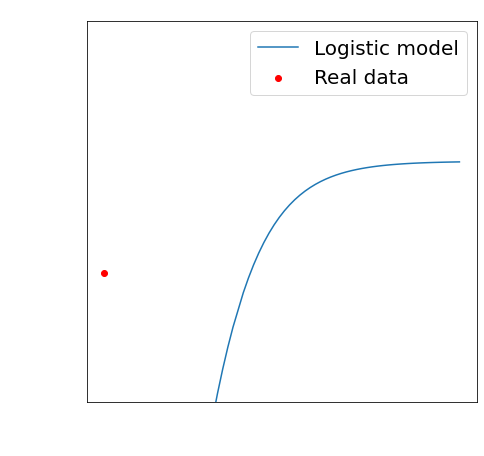

COVID is predicted to end in BURKINA FASO 159 days after January 1st 2020


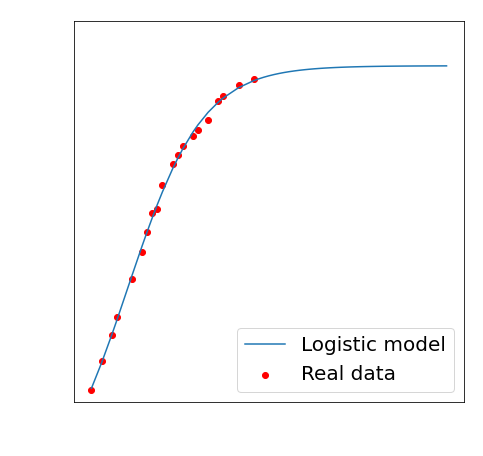

COVID is predicted to end in GHANA 207 days after January 1st 2020


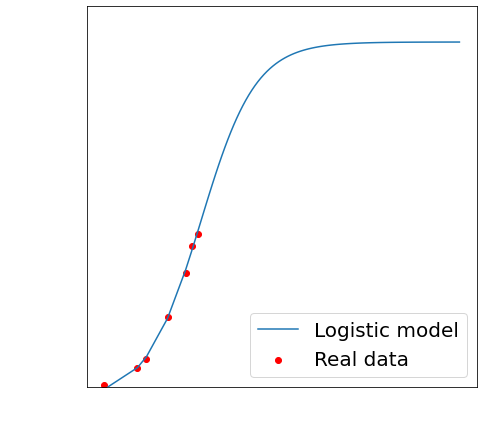

COVID is predicted to end in COTE D'IVOIRE 158 days after January 1st 2020


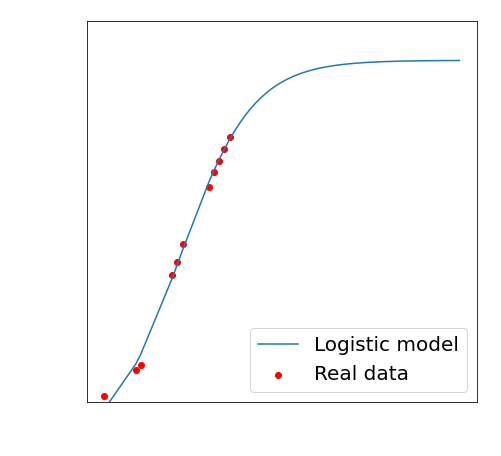

COVID is predicted to end in MAURITIUS 117 days after January 1st 2020


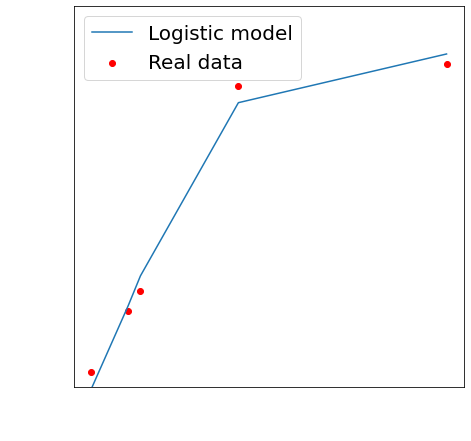


COVID is predicted to end in NIGERIA 117 days after January 1st 2020


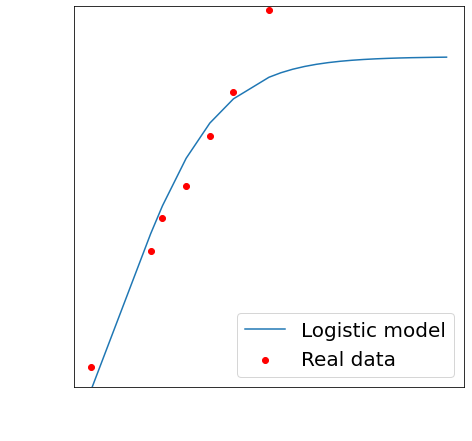

COVID is predicted to end in CAMEROON 240 days after January 1st 2020


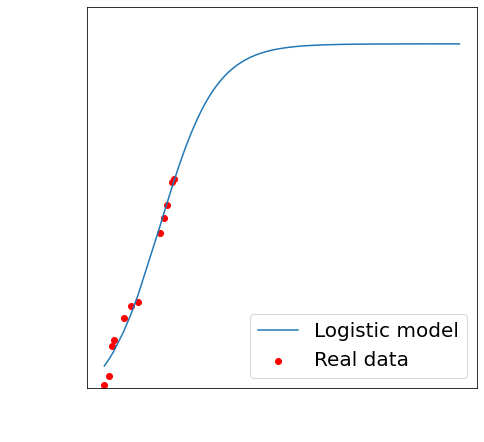


COVID is predicted to end in SENEGAL 240 days after January 1st 2020


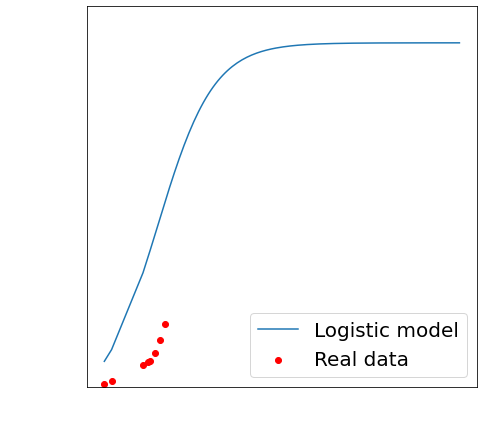

COVID is predicted to end in KENYA 296 days after January 1st 2020


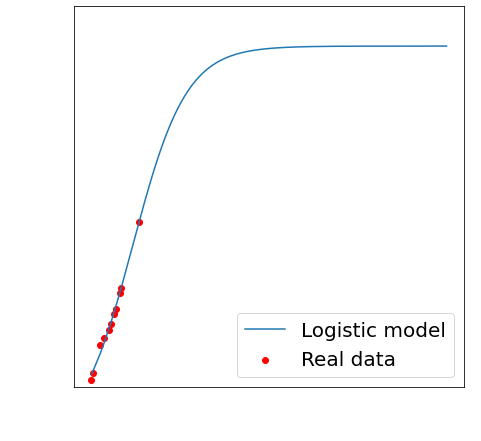

COVID is predicted to end in NIGER 123 days after January 1st 2020


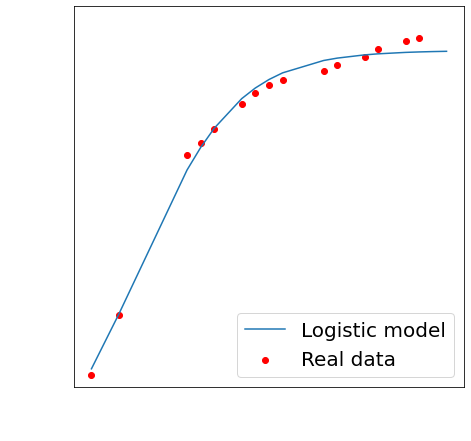

COVID is predicted to end in DJIBOUTI 214 days after January 1st 2020


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


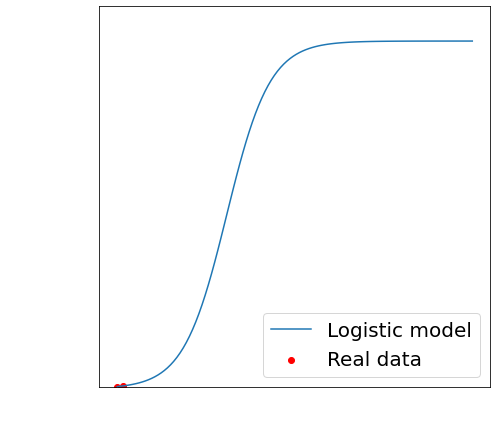

COVID is predicted to end in MALI 192 days after January 1st 2020


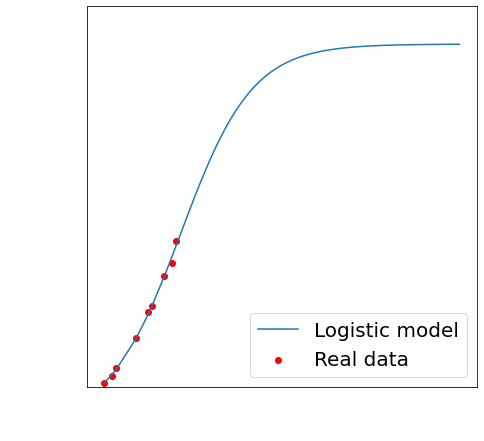


COVID is predicted to end in GUINEA 192 days after January 1st 2020


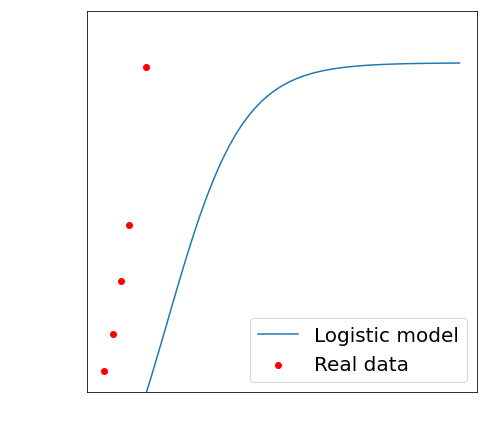

COVID is predicted to end in TANZANIA 148 days after January 1st 2020


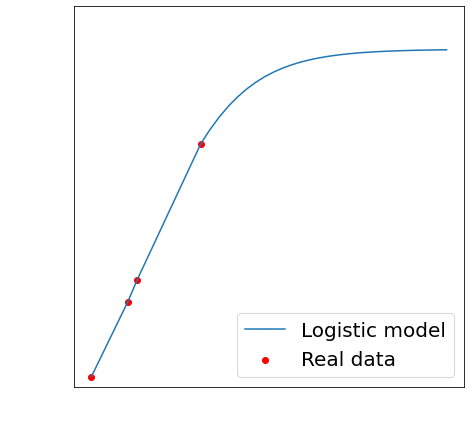

COVID is predicted to end in SOMALIA 153 days after January 1st 2020


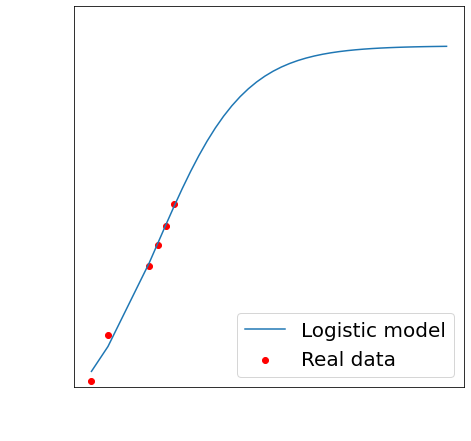


COVID is predicted to end in SUDAN 153 days after January 1st 2020


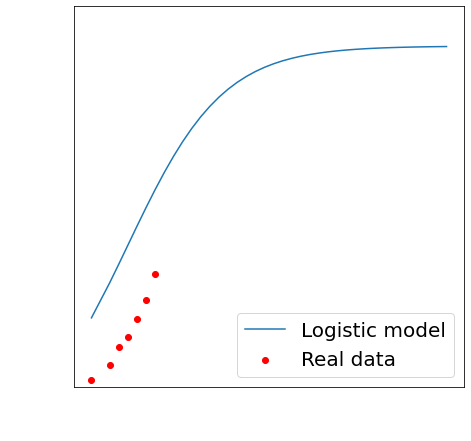

COVID is predicted to end in GABON 43256 days after January 1st 2020


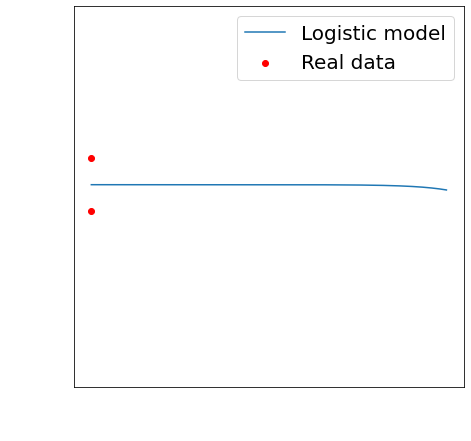


COVID is predicted to end in LIBERIA 43256 days after January 1st 2020


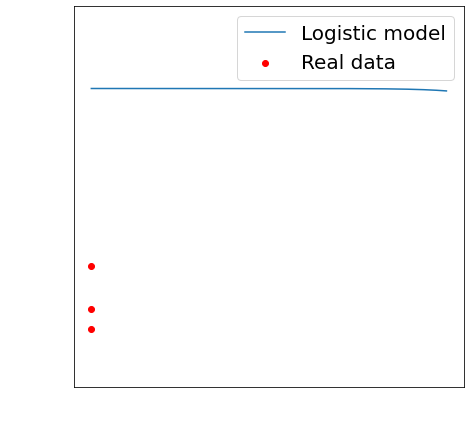

COVID is predicted to end in TOGO 126231 days after January 1st 2020


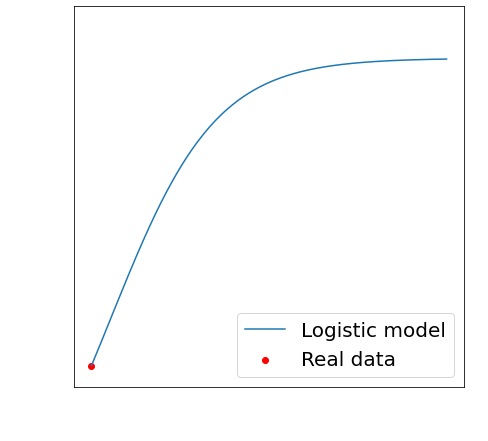

In [ ]:
#1. Data Preparation
#sum number of cases in the countries by date
extrapolate_Africa_cases = pd.DataFrame(df_Africa.groupby(['Date',"Entity"])["Total confirmed cases of COVID-19 (cases)"].sum()) #summed number of cases per day
extrapolate_Africa_cases = extrapolate_Africa_cases.add_suffix('Count').reset_index() #changed groupby to a dataframe
extrapolate_Africa_cases["Total confirmed cases of COVID-19 (cases)"] = extrapolate_Africa_cases.Date.dt.strftime('%Y-%m-%d %H:%M:%S')
extrapolate_Africa_cases

FMT = '%Y-%m-%d %H:%M:%S'
extrapolate_Africa_cases['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) #change date to string objects first
extrapolate_Africa_cases.rename(columns={"Total confirmed cases of COVID-19 (cases)Count": "cases",
                                              "Total confirmed cases of COVID-19 (cases)": "date_str"}, inplace=True) #rename needed column
date = extrapolate_Africa_cases["date_str"] #store dates column                                              
extrapolate_Africa_cases['date_str'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days)
extrapolate_Africa_cases = extrapolate_Africa_cases.drop(columns=['Date'])
extrapolate_Africa_cases

ctry_list = list(extrapolate_Africa_cases["Entity"].unique())

plt.figure(figsize=(5,5))

for i in ctry_list:
  df5 = extrapolate_Africa_cases.loc[extrapolate_Africa_cases["Entity"]==i]

  #estimate the parameter values and errors starting from the original data.
  x = list(df5.iloc[:,2])
  y = list(df5.iloc[:,1])
  try:
    fit = curve_fit(logistic_model,x,y,p0=[2,100,20000], method = "trf")
  except RuntimeError:
    print("")
  fit #gives values of a, b and c and the covariance matrix
  fit = list(fit)
  a = list(fit[0])[0]
  b = list(fit[0])[1]
  c = list(fit[0])[2]
  cov_matrix = list(fit[1])

  errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]] #gives standard error of a, b and c
  errors
  
  sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b)) #finding the day when infection will end 
  print("COVID is predicted to end in "+ str.upper(i) + " " +
        str(sol) + " days after January 1st 2020")

  #4. Plot!
  font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16}
  pred_x = list(range(max(x),sol))
  plt.rcParams['figure.figsize'] = [7,7]
  plt.rc('font', size=20)
  # Real data
  plt.scatter(x,y,label="Real data",color="red")
  # Predicted logistic curve
  plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], 
           label="Logistic model" )
  # Predicted exponential curve
  plt.legend()
  # print(str.upper(i))
  plt.xlabel("Days since 1 January 2020",fontdict=font)
  plt.ylabel("Total number of infected people ("  + str.upper(i) + ")",
             fontdict=font)
  plt.tick_params(colors='w')
  plt.ylim(min(y)*0.9,fit[0][2]*1.1)
  plt.show()

#Predicting the effect of current government measures on COVID cases (World)

I explored how many days, since the 100th cases that each country had, 14 days after they instituted the governmental measures. To streamline the dates, I binned the dates into the first one month, `one_month` and the second one month, `two_months`. I then used `LogisticRegressionCV()` to fit a model to my dataset and obtained an accuracy of `91%`.

In [ ]:
#find how many days since 100th case that each country had 14 DAYS AFTER they instituted the measures 
#add 14 days to each date in df_World_School_Closures and df_World_Gov_Measures
df_World_School_Closures['Date'] = pd.to_datetime(df_World_School_Closures['Date']).apply(pd.DateOffset(7))
df_World_Gov_Measures['Date'] = pd.to_datetime(df_World_Gov_Measures['Date']).apply(pd.DateOffset(7))

In [ ]:
#rename each column of  df_World_School_Closures and df_World_Gov_Measures as "name"+14days ago
df_World_School_Closures.rename(columns = {'scale':'school_closure_scale_14_days_ago'}, inplace = True) 
df_World_Gov_Measures.rename(columns = {'category':'gov_measure_category_14_days_ago'}, inplace = True) 
df_World_Gov_Measures.rename(columns = {'targeted_pop_group':'gov_measure_targeted_pop_group_14_days_ago'}, inplace = True) 
df_World_Gov_Measures.rename(columns = {'source':'gov_measure_source_14_days_ago'}, inplace = True) 


In [ ]:
#merge these dataframes by date and country: df_World_School_Closures, df_World_Gov_Measures, df_World
indicators_after_100th_case = pd.merge(df_World_School_Closures, df_World_Gov_Measures, left_on=["Date", "Country"], right_on=["Date", "Country"])
indicators_after_100th_case = pd.merge(indicators_after_100th_case, df_World, left_on=["Date", "Country"], right_on=["Date", "Entity"])

#drop all rows with african countries
alist3 = []
for i in WA_list:
  alist4 = indicators_after_100th_case[indicators_after_100th_case["Country"]==i].index.values
  for j in alist4:
    alist3.append(j)
    alist4 = []
alist3

#extract those rows into a new dataframe before dropping then:
df9 = indicators_after_100th_case.loc[alist3]
indicators_after_100th_case = indicators_after_100th_case.drop(alist3)

# #keep only these columns: school closure scale, category, targeted_pop_group, 
# #date, country, Daily confirmed cases
indicators_after_100th_case= indicators_after_100th_case[["Date","Country","school_closure_scale_14_days_ago","gov_measure_category_14_days_ago",
          "gov_measure_targeted_pop_group_14_days_ago","Days since the 100th confirmed case (days)"]]

#drop all null rows
indicators_after_100th_case = indicators_after_100th_case.dropna()
indicators_after_100th_case = indicators_after_100th_case.drop(columns="Date")

#do one-hot encoding first:
df8 = indicators_after_100th_case[['school_closure_scale_14_days_ago',
       'gov_measure_category_14_days_ago',
       'gov_measure_targeted_pop_group_14_days_ago']].copy() 
df8 = pd.get_dummies(df8, columns=df8.columns) #one hot encoding happens here
indicators_after_100th_case= indicators_after_100th_case.merge(df8, left_on=indicators_after_100th_case.index, right_on=df8.index) #add on the classes again  
indicators_after_100th_case = indicators_after_100th_case.drop(columns=["key_0","Country","school_closure_scale_14_days_ago",
                                                                        "gov_measure_category_14_days_ago",	
                                                                        "gov_measure_targeted_pop_group_14_days_ago"]) 
indicators_after_100th_case["Bin_Dates"] = pd.cut(x=indicators_after_100th_case["Days since the 100th confirmed case (days)"], 
                                                  bins=[0,30,60], labels = ["one_month","two_months"])
indicators_after_100th_case = indicators_after_100th_case.dropna()
alist5 = ["one_month","two_months"]
indicators_after_100th_case = indicators_after_100th_case.loc[indicators_after_100th_case["Bin_Dates"].isin(alist5)]

In [ ]:
#learn from the countries that had the most cases: find out how the indicators change for Days since the 100th total confirmed case (days)
# Method: Logistic  CV
#Cross Validation
X = indicators_after_100th_case.drop(columns=["Bin_Dates","Days since the 100th confirmed case (days)"])
y = indicators_after_100th_case["Bin_Dates"]
classifier = LogisticRegressionCV(cv=15, random_state=0,max_iter=100000).fit(X, y)
print("The mean accuracy is", classifier.score(X,y))

The mean accuracy is 0.9109518935516888


#Predicting the effect of current government measures on COVID cases (Africa)

I explored how many days, since the 100th cases that each country had, 14 days after they instituted the governmental measures. To streamline the dates, I binned the dates into the first nine days, `nine_days` and the second nine days, `eighteen_days`. I then used `LogisticRegressionCV()` to fit a model to my dataset and obtained an accuracy of `69.6%`.

In [ ]:
#find how many days since 100th case that each country had 14 DAYS AFTER they instituted the measures 
#add 14 days to each date in df_World_School_Closures and df_World_Gov_Measures
df_Africa_School_Closures['Date'] = pd.to_datetime(df_Africa_School_Closures['Date']).apply(pd.DateOffset(7))
df_Africa_Gov_Measures['Date'] = pd.to_datetime(df_Africa_Gov_Measures['Date']).apply(pd.DateOffset(7))

In [ ]:
#rename each column of  df_World_School_Closures and df_World_Gov_Measures as "name"+14days ago
df_Africa_School_Closures.rename(columns = {'scale':'school_closure_scale_14_days_ago'}, inplace = True) 
df_Africa_Gov_Measures.rename(columns = {'category':'gov_measure_category_14_days_ago'}, inplace = True) 
df_Africa_Gov_Measures.rename(columns = {'targeted_pop_group':'gov_measure_targeted_pop_group_14_days_ago'}, inplace = True) 
df_Africa_Gov_Measures.rename(columns = {'source':'gov_measure_source_14_days_ago'}, inplace = True) 

In [ ]:
indicators_after_100th_case = pd.merge(df_Africa_School_Closures, df_Africa_Gov_Measures, left_on=["Date", "Country"], right_on=["Date", "Country"])
indicators_after_100th_case = pd.merge(indicators_after_100th_case, df_Africa, left_on=["Date", "Country"], right_on=["Date", "Entity"])
indicators_after_100th_case

# #keep only these columns: school closure scale, category, targeted_pop_group, 
# #date, country, Daily confirmed cases
indicators_after_100th_case= indicators_after_100th_case[["Date","Country","school_closure_scale_14_days_ago","gov_measure_category_14_days_ago",
          "gov_measure_targeted_pop_group_14_days_ago","Days since the 100th confirmed case (days)"]]

#drop all null rows
indicators_after_100th_case = indicators_after_100th_case.dropna()
indicators_after_100th_case = indicators_after_100th_case.drop(columns="Date")

#do one-hot encoding first:
df8 = indicators_after_100th_case[['school_closure_scale_14_days_ago',
       'gov_measure_category_14_days_ago',
       'gov_measure_targeted_pop_group_14_days_ago']].copy() 
df8 = pd.get_dummies(df8, columns=df8.columns) #one hot encoding happens here
indicators_after_100th_case= indicators_after_100th_case.merge(df8, left_on=indicators_after_100th_case.index, right_on=df8.index) #add on the classes again  
indicators_after_100th_case = indicators_after_100th_case.drop(columns=["key_0","Country","school_closure_scale_14_days_ago",
                                                                        "gov_measure_category_14_days_ago",	"gov_measure_targeted_pop_group_14_days_ago"]) 

indicators_after_100th_case["Bin_Dates"] = pd.cut(x=indicators_after_100th_case["Days since the 100th confirmed case (days)"], 
                                                  bins=[0,9,18], labels = ["nine_days","eighteen_days"])

indicators_after_100th_case = indicators_after_100th_case.dropna()
alist5 = ["nine_days","eighteen_days"]
indicators_after_100th_case = indicators_after_100th_case.loc[indicators_after_100th_case["Bin_Dates"].isin(alist5)]

# Method: Logistic  CV
#Cross Validation
X = indicators_after_100th_case.drop(columns=["Bin_Dates","Days since the 100th confirmed case (days)"])
y = indicators_after_100th_case["Bin_Dates"]
classifier = LogisticRegressionCV(cv=15, random_state=0,max_iter=100000).fit(X, y)
print("The mean accuracy is", classifier.score(X,y))

The mean accuracy is 0.6956521739130435


#Conclusion

I decided to focus my final project on this topic given that the COVID pandemic has affected a lot of people all over the world and there is a growing need to learn more about the virus including its mode of spread and the indicators of interest for the virus. I focused on African countries to contribute to current research on COVID on the continent. 

In relation to the big idea questions raised, I was able to prepare a logistic model, for some African countries, which determined approximate dates for when the curve will flatten. I was also able to determine the effects of government measures on the the rate of spread of COVID, after the first 100 days, in different countries. 

However, there is more to explore as the days go by as there is always new information coming in on COVID. Therefore, for future explorations, I plan to extend on this project this summer and to focus on the following:
* developing an SIR Model for COVID in different African countries 
* considering other potential indicators such as:
  * ventilators available per country or region
  * number of tests done per country or region
  * Body Mass Index and how it relates to susceptibility to COVID for people under 50 years
  * immunological naivety (for example, in North Korea)
  * population density 
  * pollution
* Considering how I can use Recurrent Neural Networks to model the spread of the virus
* Considering particular regions or countries as case studies to learn about what African countries can learn to eradicate the virus as we are the least affected continent. For example, I can learn from causes of the rate of spread of COVID in Italy or a youthful country (as Ghana has a large youthful population). This exploration will be particularly helpful with answering Big Idea Question 4.

Finally, I plan to share my findings with some governmental or non-governmental institutions in Ghana which might be interested in Data Science. I am currently considering sharing my findings with [minoHealth AI Labs](https://www.crunchbase.com/organization/minohealth#section-overview) in Ghana which focuses on "democratising Quality Healthcare with innovative and cutting edge technologies like Artificial Intelligence, Data Science and Cloud computing in Africa".

#References

*   Pydata, https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html, Accessed 30th March 2020

*   Toward Data Science, https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d/, Accessed 30th March 2020

*   Python Data Analysis Library, https://pandas.pydata.org/. Accessed 30th March 2020.
*   NumPy, https://numpy.org/. Accessed 30th March 2020.
*   skLearn, https://scikit-learn.org/stable/. Accessed 30th March 2020. 
*   Seaborn, https://seaborn.pydata.org/. Accessed 30th March 2020.
*   Our World in Data, https://ourworldindata.org. Accessed 30th March 2020. 
*   European Centre for Disease Prevention and Control,https://www.ecdc.europa.eu/en. Accessed 30th March 2020.
*   Centre for Systems Science and Engineering at Johns Hopkins University, https://github.com/CSSEGISandData. Accessed 30th March 2020.
*   World Health Organization (WHO), https://www.who.int/. Accessed 30th March 2020. 
*   Be Outbreak Prepare, https://github.com/beoutbreakprepared/nCoV2019. Accessed 30th March 2020. 
*   minoHealth, https://www.crunchbase.com/organization/minohealth#section-overview. Accessed May 12th 2020. 